In [21]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.font_manager as fm
prop = fm.FontProperties(fname='./Marianne-Regular.otf')

In [22]:
df = pd.read_csv('departement2021.csv',dtype=str)
deps = gpd.read_file('deptot.geojson')
points = gpd.read_file('pref.geojson')

In [27]:
databrut = pd.read_csv('https://www.data.gouv.fr/fr/datasets/r/4f39ec91-80d7-4602-befb-4b522804c0af',dtype=str,sep=";")
data = databrut.rename(columns={'dep':'code','n_cum_dose1':'data'})
data.data = data.data.astype(float)

In [28]:
data = data[data['jour'] == data.jour.max()]


In [30]:
%matplotlib inline

In [193]:
def generateImg(titre, unite, dossier,format_type):
    if(unite != ''):
        unite = ' '+unite
    print('Regions')
    for r in df.REG.unique():
        print(r)
        naq = df[df['REG'] == r].DEP.unique()
        states = pd.merge(deps,data,on='code',how='left')
        fig, ax = plt.subplots()
        ax.set_aspect('equal')
        plt.rcParams['figure.figsize'] = (10, 10)
        #base = states[states['code'].isin(naq)].plot(column='data',edgecolor="white",linewidth=3)
        base = states[states['code'].isin(naq)].plot(color='#D4D4DE',edgecolor="white",linewidth=3)
        pref = points[points['DeptNum'].isin(naq)]
        max = states[states['code'].isin(naq)]['data'].max()
        min = states[states['code'].isin(naq)]['data'].min()
        for d in pref.DeptNum.unique():
            rd = states[states['code'] == d]['data'].iloc[0]
            if(max-min != 0):
                size = ((1000 * (1+(rd - min) / (max-min))) / pref.shape[0])*25
            else:
                size = 1000/pref.shape[0]*20
            pref[pref['DeptNum'] == d].plot(ax=base, marker='o', color='#A5A5D4',  alpha=0.7, markersize=size)
        base.axis('off')
        for dep in pref.DeptNum.unique():
            if(format_type == 'int'):
                txt = str(int(states[states['code'] == dep]['data'].iloc[0]))+unite
            else:
                txt = str(states[states['code'] == dep]['data'].iloc[0])+unite
                
            base.annotate(txt,
                          xy=(pref[pref['DeptNum'] == dep]['LonDD'].iloc[0],pref[pref['DeptNum'] == dep]['LatDD'].iloc[0]), 
                          color='white',
                          fontsize="large", weight='heavy',
                          horizontalalignment='center',
                          verticalalignment='center')
        base.set_title(titre, fontproperties=prop, size=32)

        base.text(0, 0, 'Source : data.gouv.fr', horizontalalignment='left',
                  verticalalignment='center', transform=ax.transAxes)
        base.text(0, 0.03, 'Région '+df[df['REG'] == r]['libelle_reg'].iloc[0], horizontalalignment='left',
                  verticalalignment='center', transform=ax.transAxes)
        base.figure.savefig(dossier+'/reg/'+r+'.png')
        plt.close()
    
    print("Départements")
    for r in df.DEP.unique():
        print(r)
        naq = df[df['DEP'] == r].DEP.unique()
        states = pd.merge(deps,data,on='code',how='left')
        fig, ax = plt.subplots()
        ax.set_aspect('equal')
        plt.rcParams['figure.figsize'] = (10, 10)
        #base = states[states['code'].isin(naq)].plot(column='data',edgecolor="white",linewidth=3)
        base = states[states['code'].isin(naq)].plot(color='#D4D4DE',edgecolor="white",linewidth=3)
        pref = points[points['DeptNum'].isin(naq)]
        max = states[states['code'].isin(naq)]['data'].max()
        min = states[states['code'].isin(naq)]['data'].min()
        for d in pref.DeptNum.unique():
            rd = states[states['code'] == d]['data'].iloc[0]
            if(max-min != 0):
                size = ((1000 * (1+(rd - min) / (max-min))) / pref.shape[0])*25
            else:
                size = 1000/pref.shape[0]*20
            pref[pref['DeptNum'] == d].plot(ax=base, marker='o', color='#A5A5D4',  alpha=0.7, markersize=size)
        base.axis('off')
        for dep in pref.DeptNum.unique():
            if(format_type == 'int'):
                txt = str(int(states[states['code'] == dep]['data'].iloc[0]))+unite
            else:
                txt = str(states[states['code'] == dep]['data'].iloc[0])+unite
            base.annotate(txt,
                          xy=(pref[pref['DeptNum'] == dep]['LonDD'].iloc[0],pref[pref['DeptNum'] == dep]['LatDD'].iloc[0]), 
                          color='white',
                          fontsize="large", weight='heavy',
                          horizontalalignment='center',
                          verticalalignment='center')
        base.set_title(titre, fontproperties=prop, size=32)

        base.text(0, 0, 'Source : data.gouv.fr', horizontalalignment='left',
                  verticalalignment='center', transform=ax.transAxes)
        base.text(0, 0.03, 'Département '+df[df['DEP'] == r]['LIBELLE'].iloc[0], horizontalalignment='left',
                  verticalalignment='center', transform=ax.transAxes)
        base.figure.savefig(dossier+'/dep/'+r+'.png')
        plt.close()

Regions
84
32
93
44
76
28
75
24
27
53
94
52
11
01
02
03
04
06
Départements
01
02


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/geopandas/plotting.py:658: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



03


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:51: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



04
05
06
07
08
09
10
11
12
13
14
15
16
17
18
19
21
22
23
24
25
26
27
28
29
2A
2B
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
971
972
973
974
976


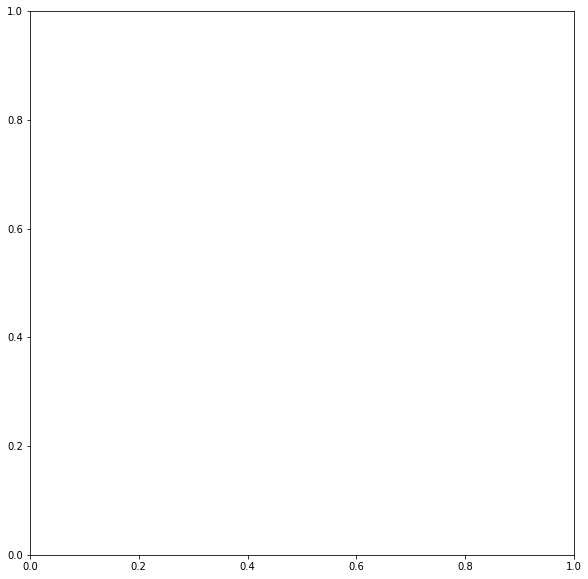

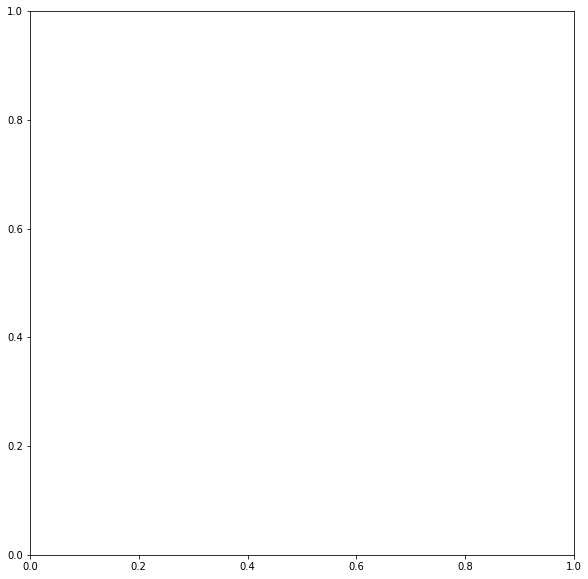

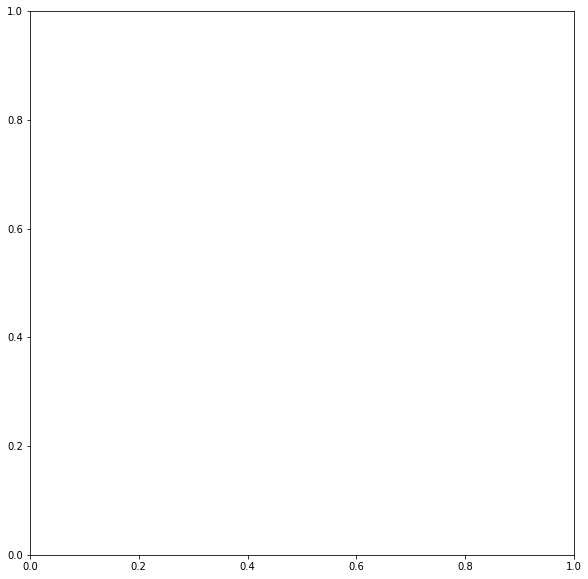

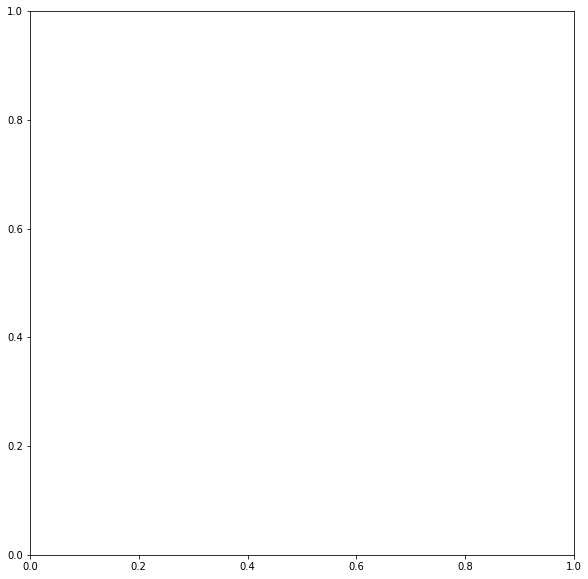

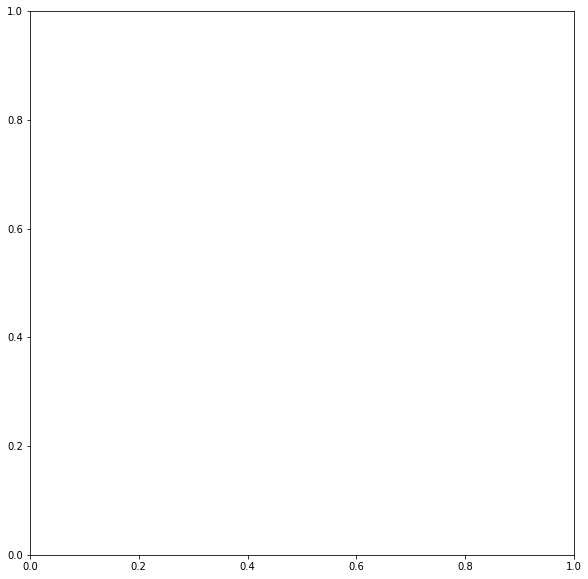

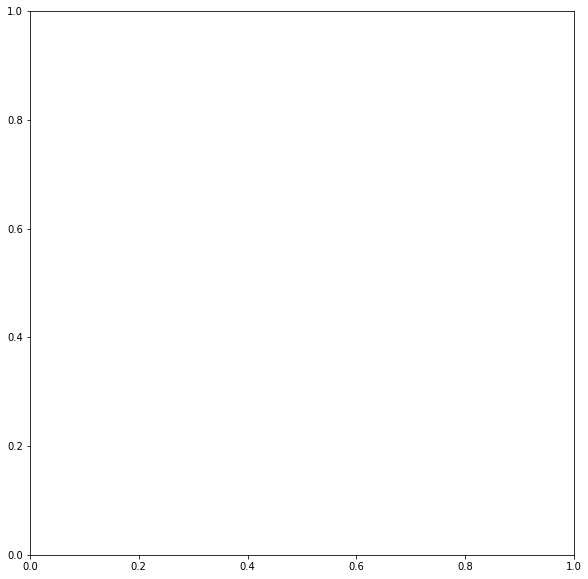

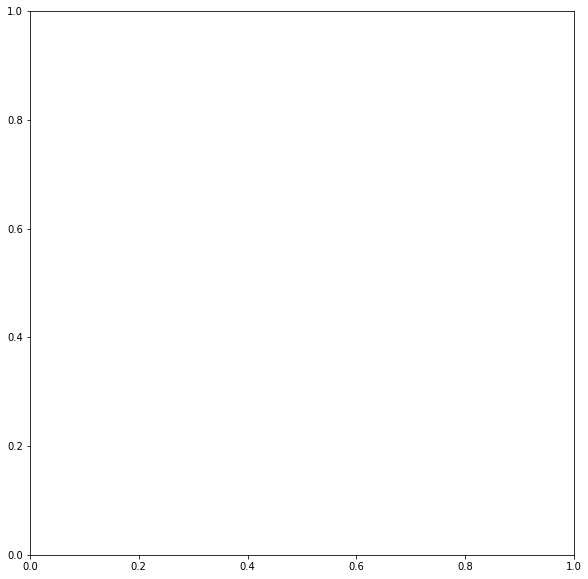

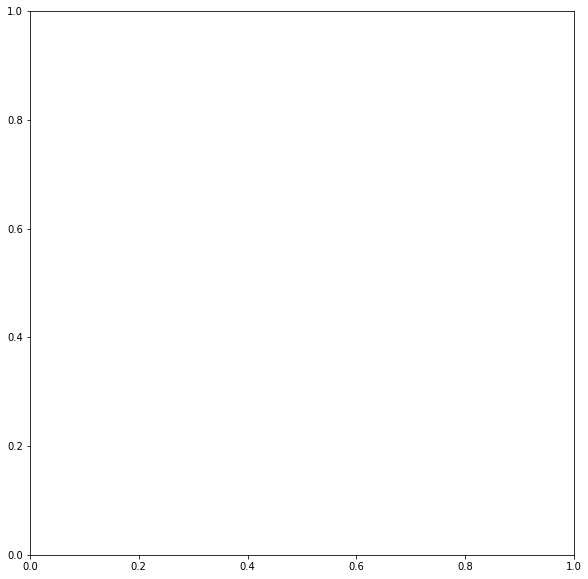

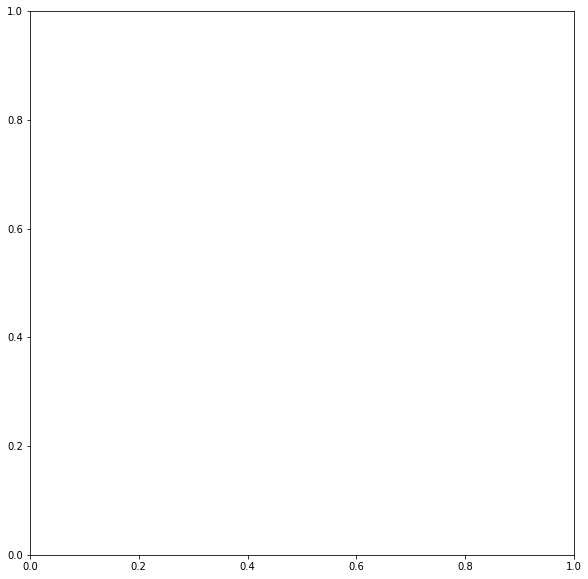

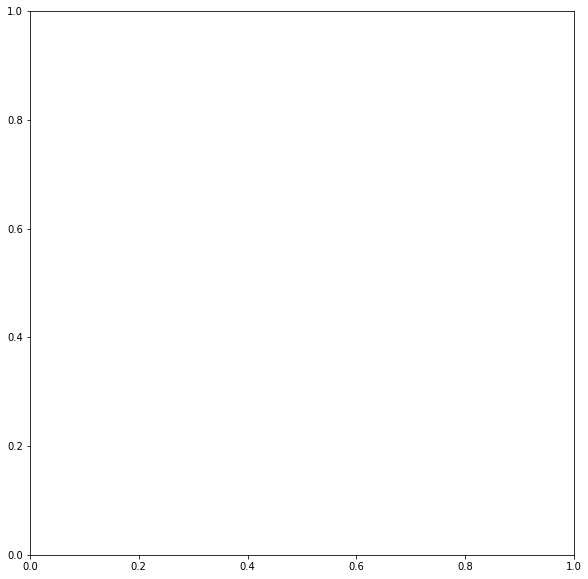

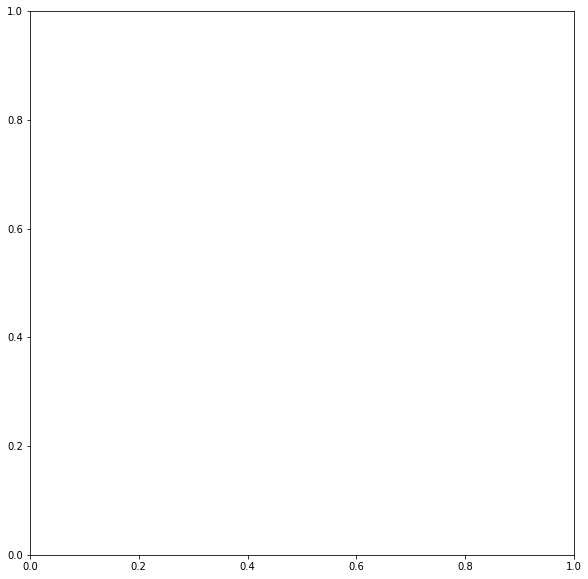

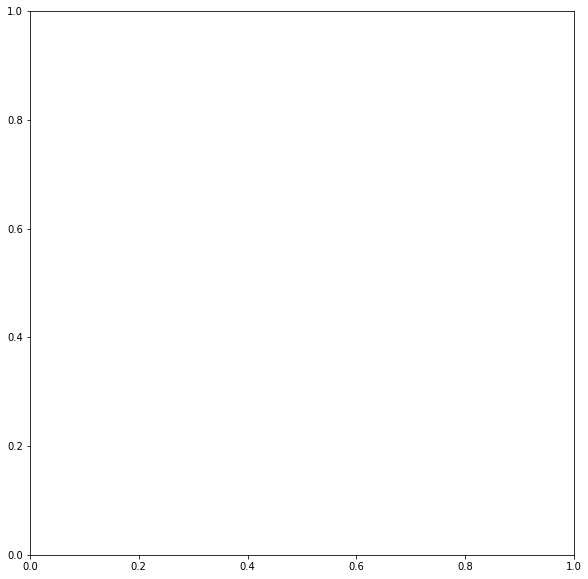

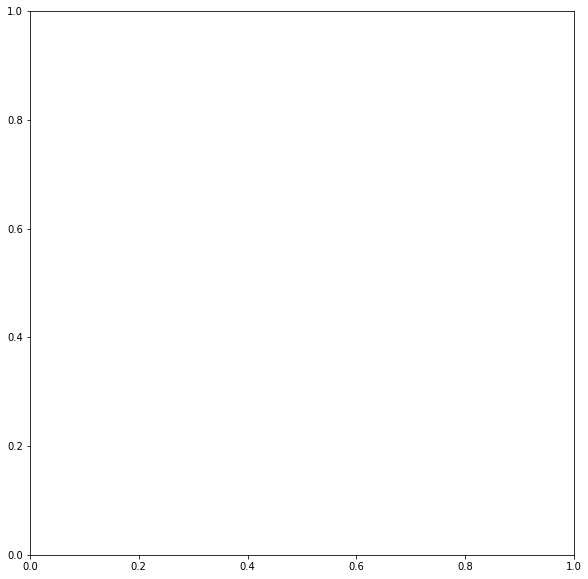

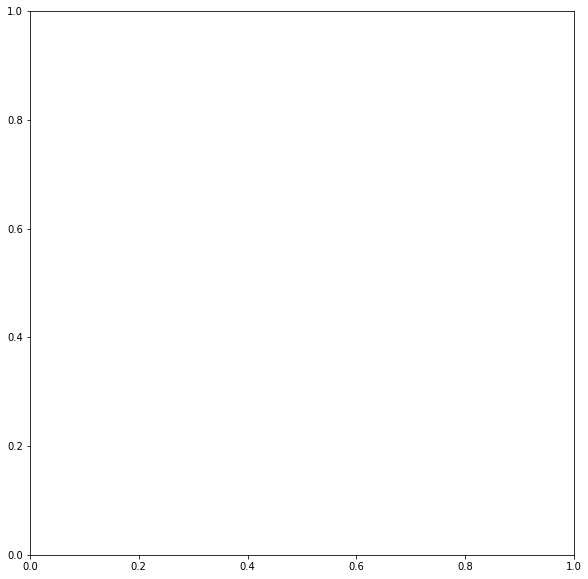

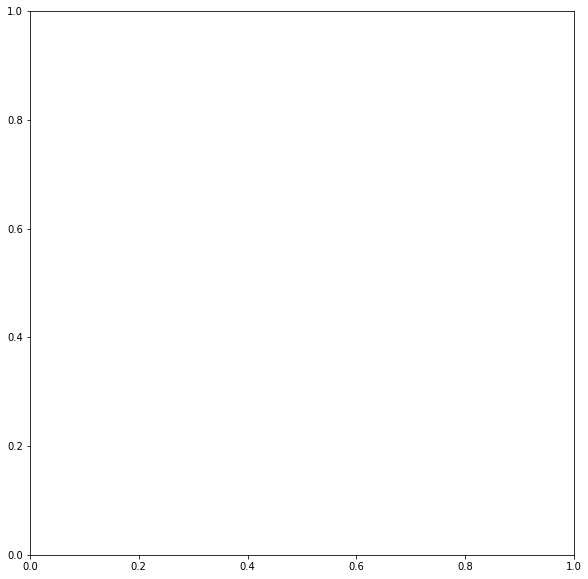

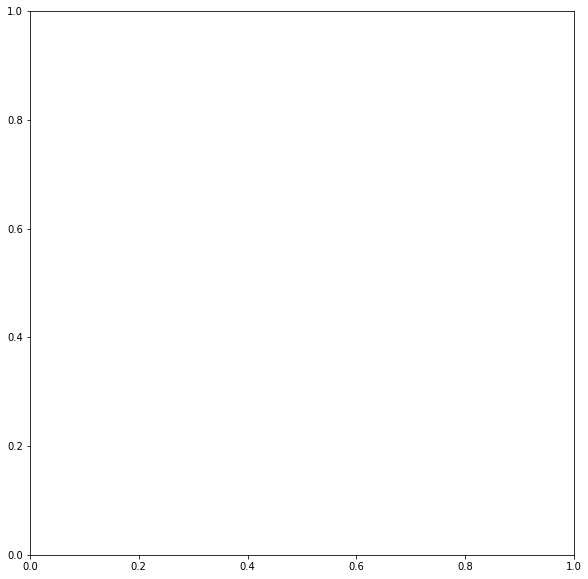

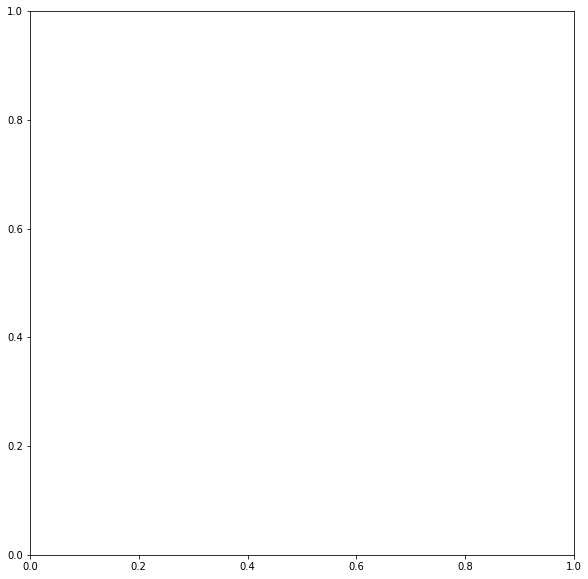

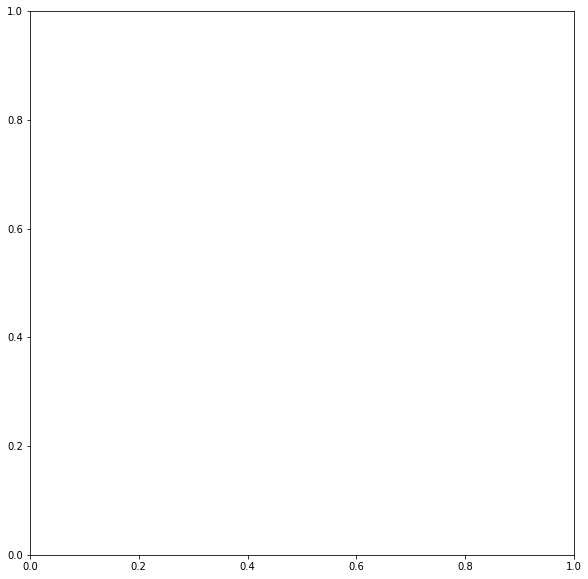

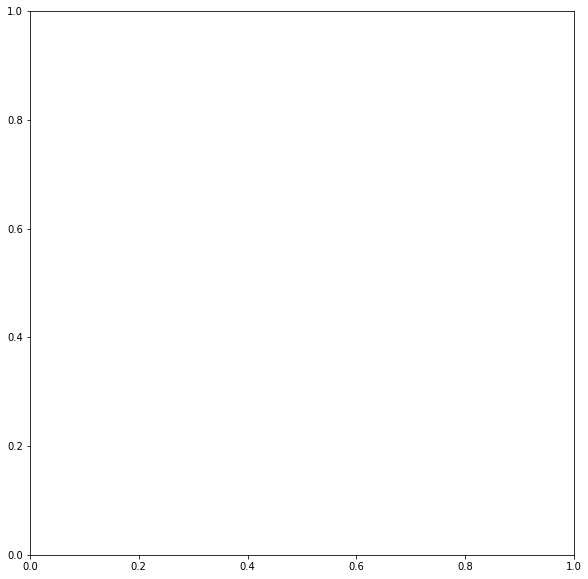

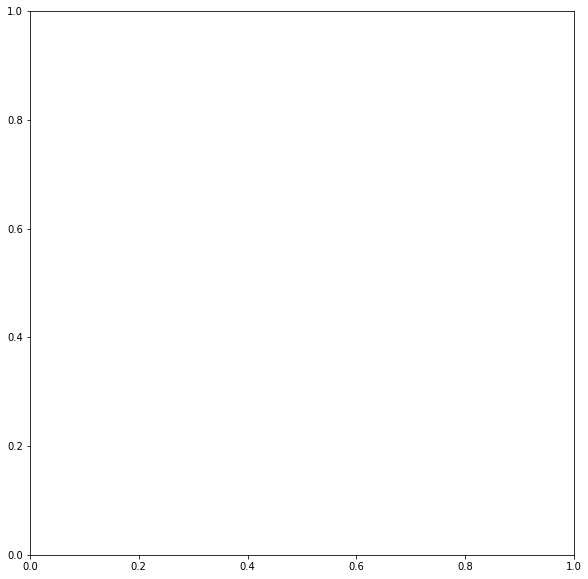

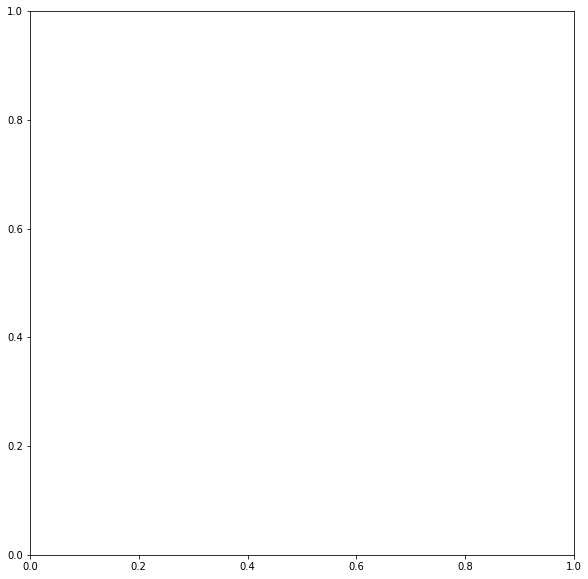

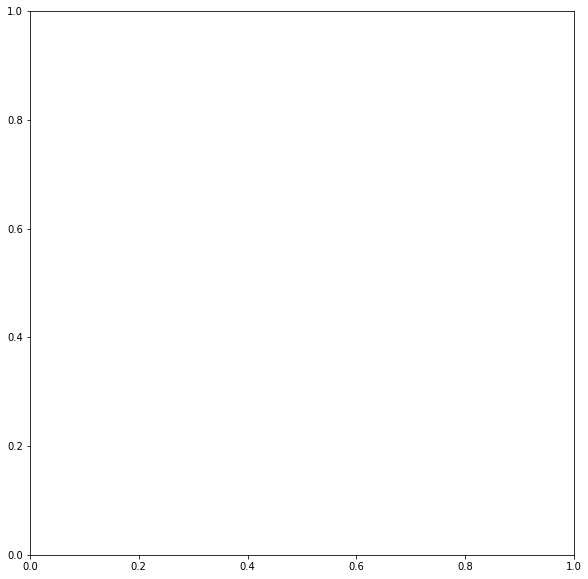

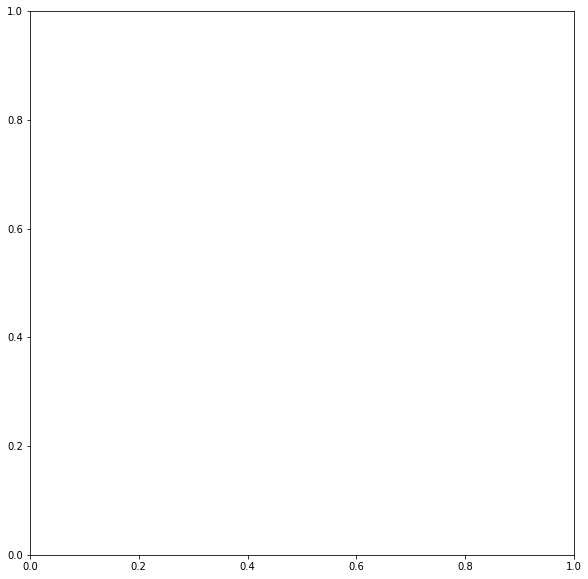

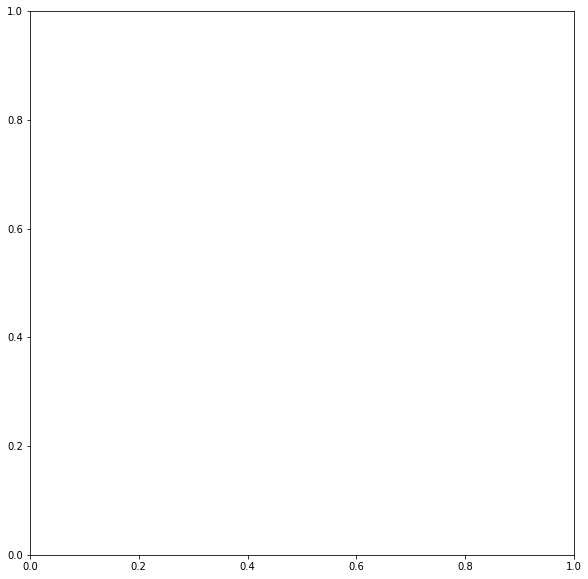

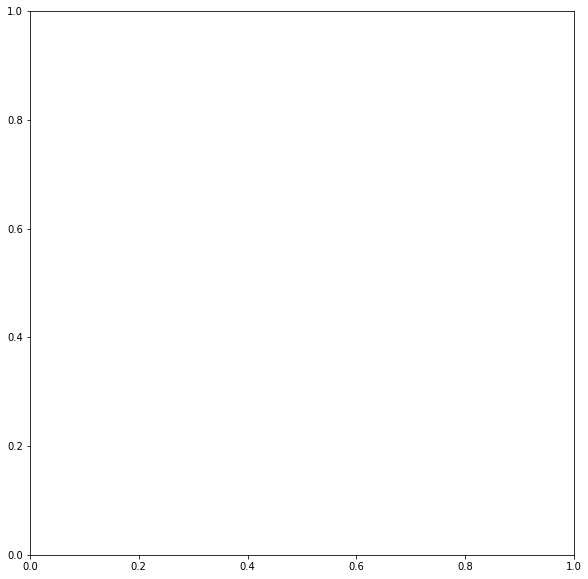

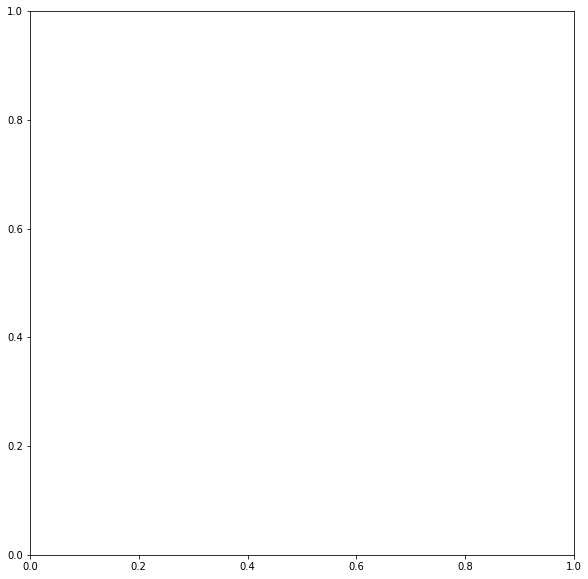

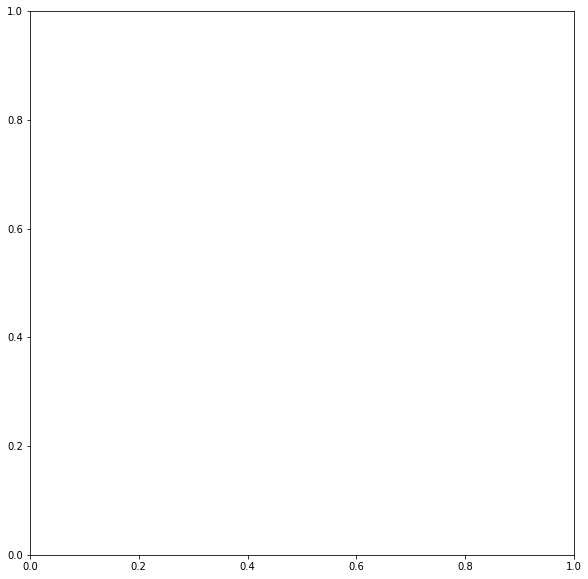

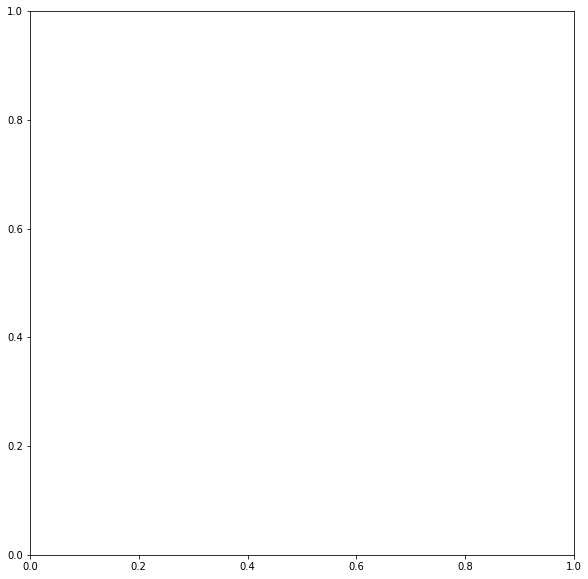

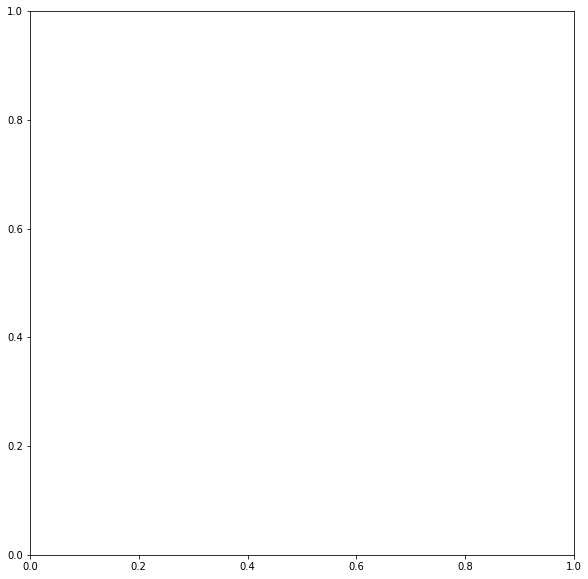

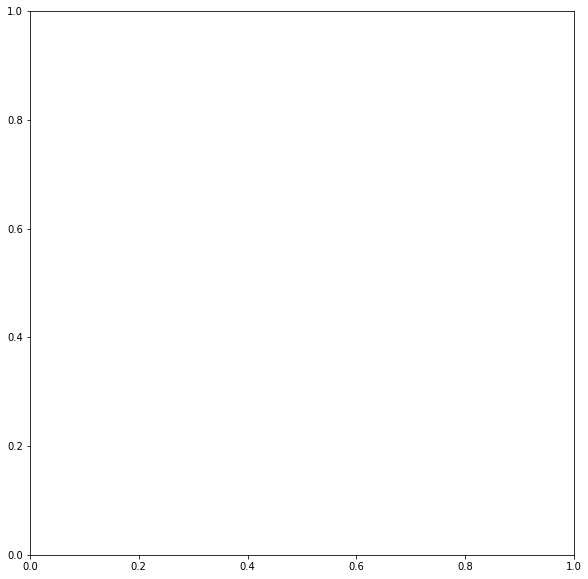

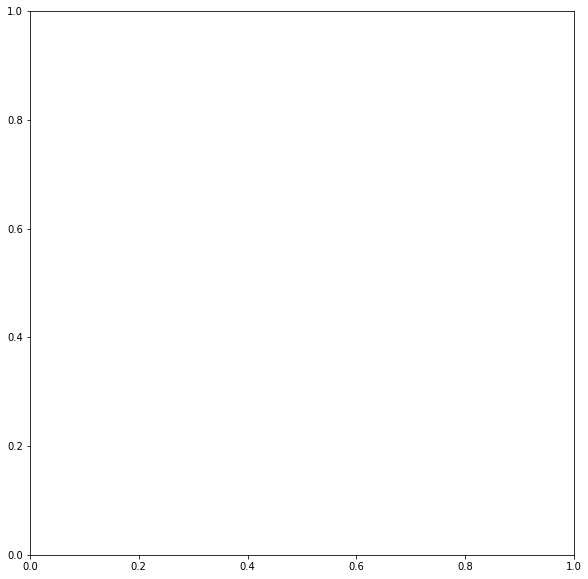

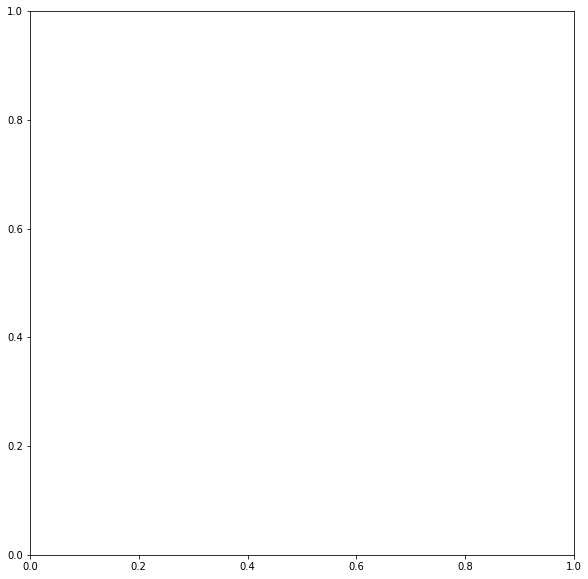

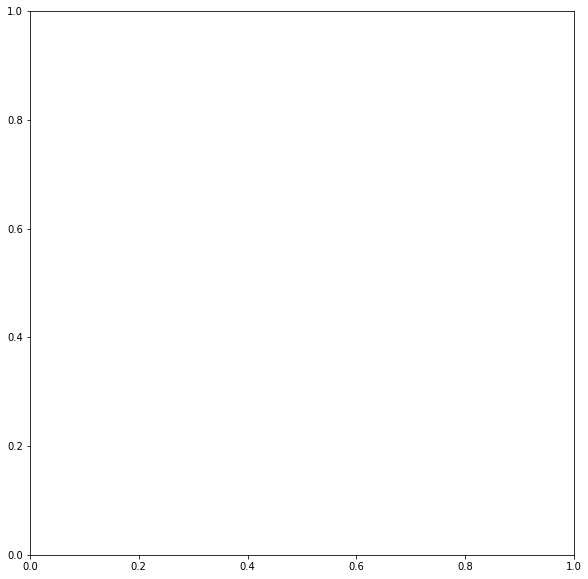

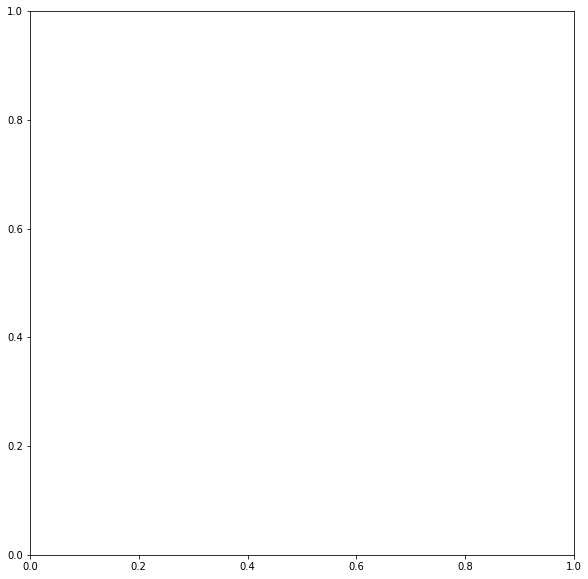

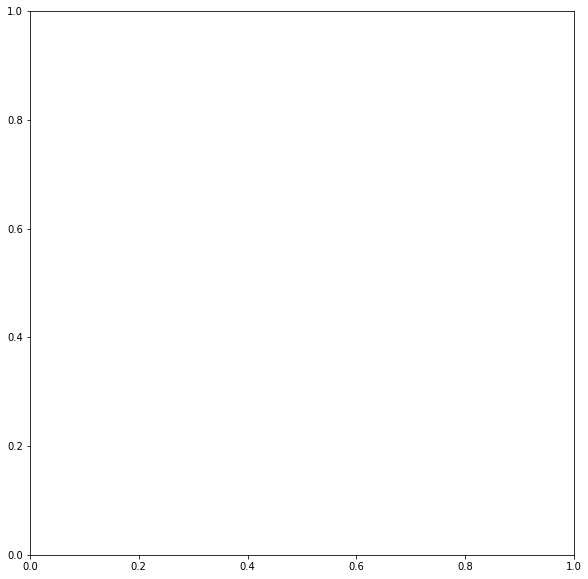

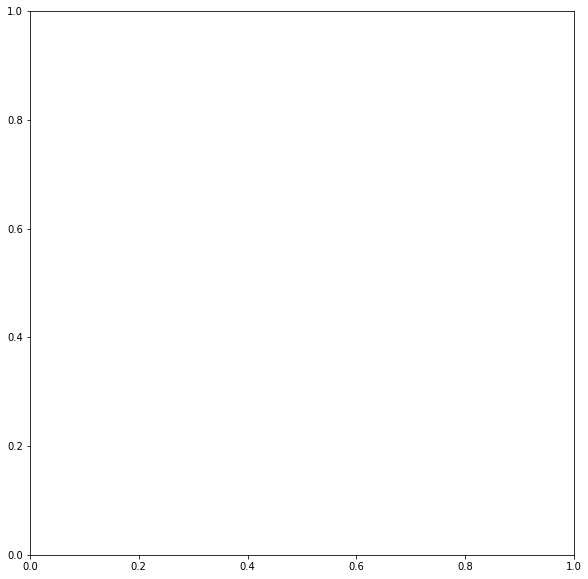

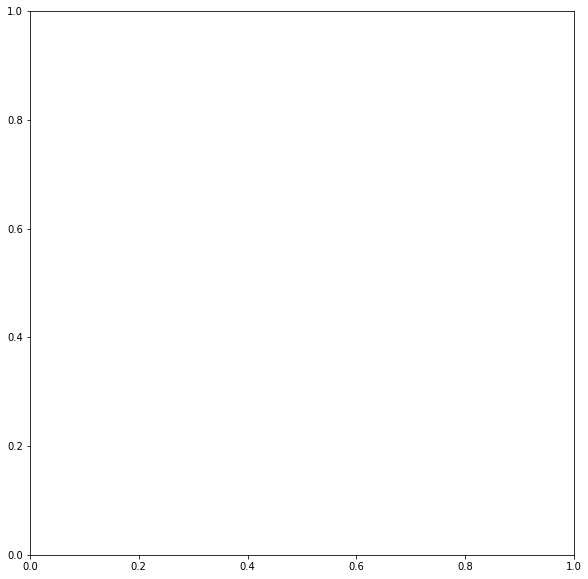

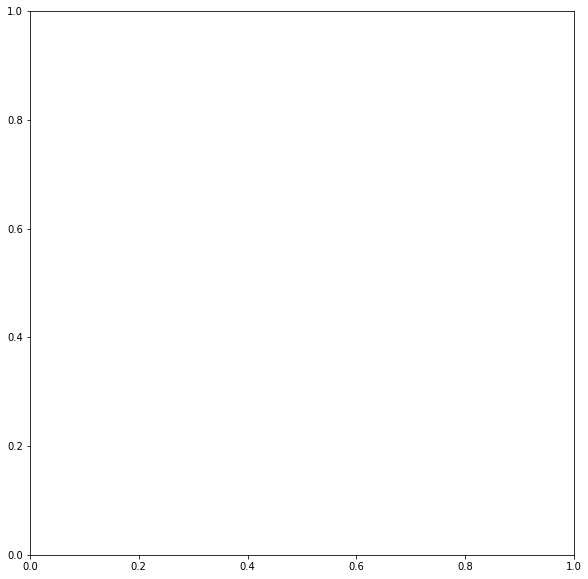

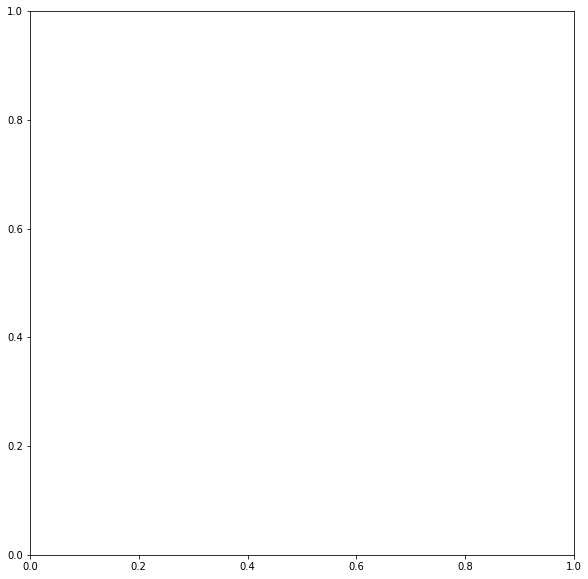

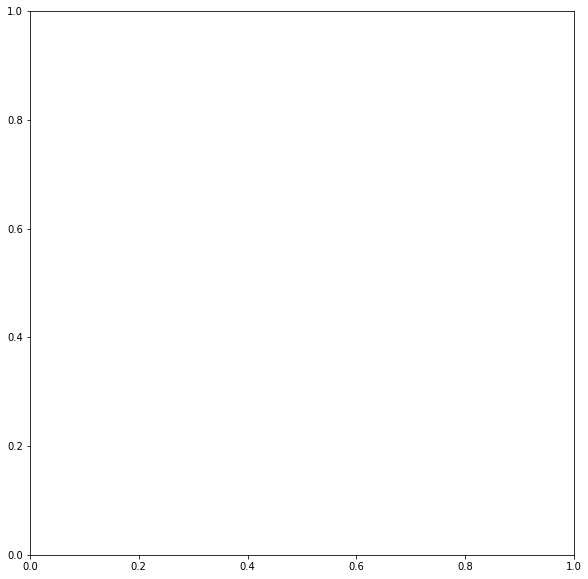

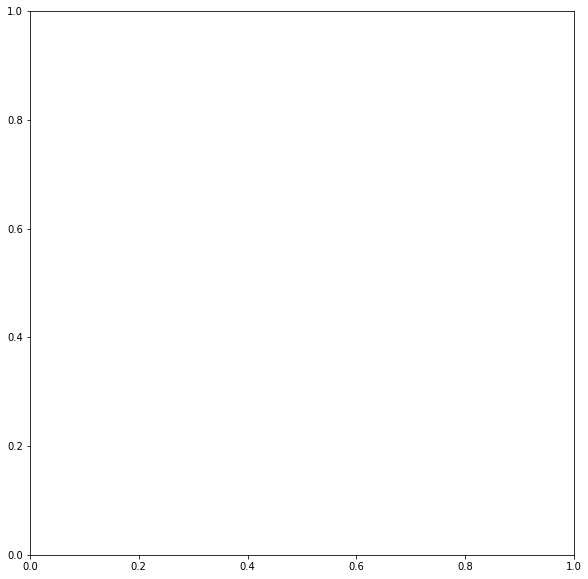

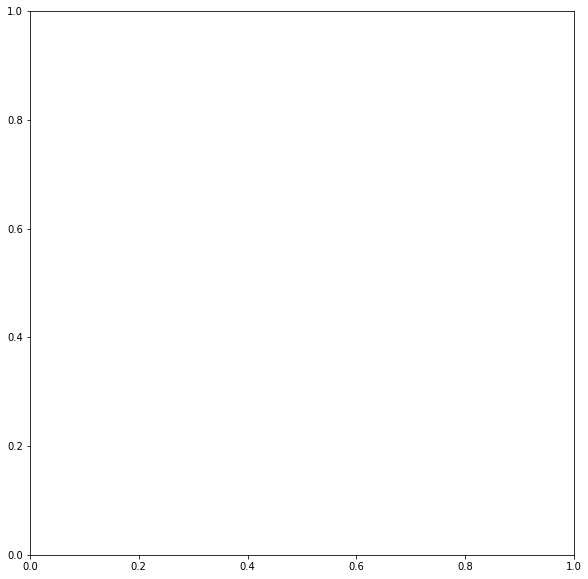

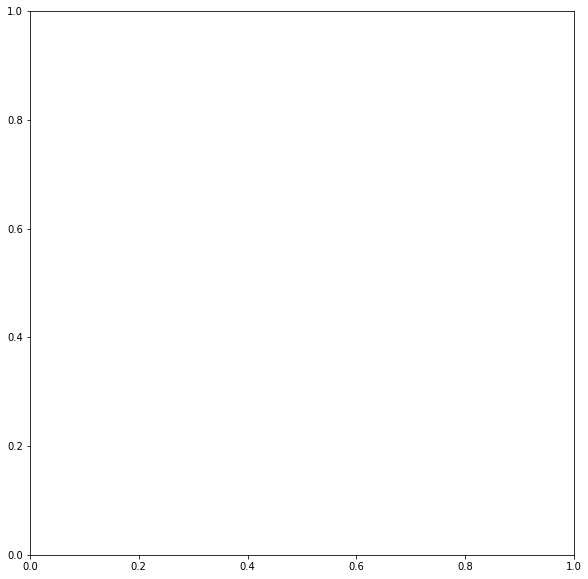

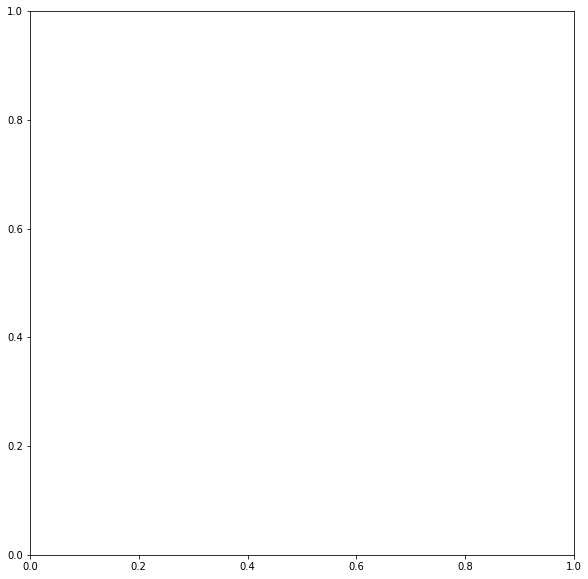

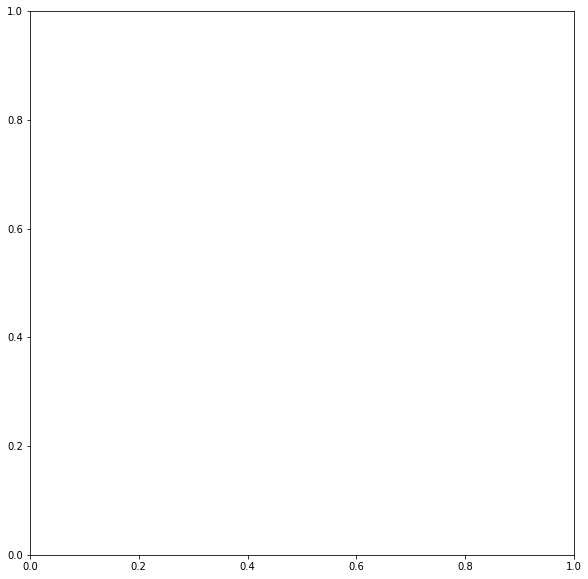

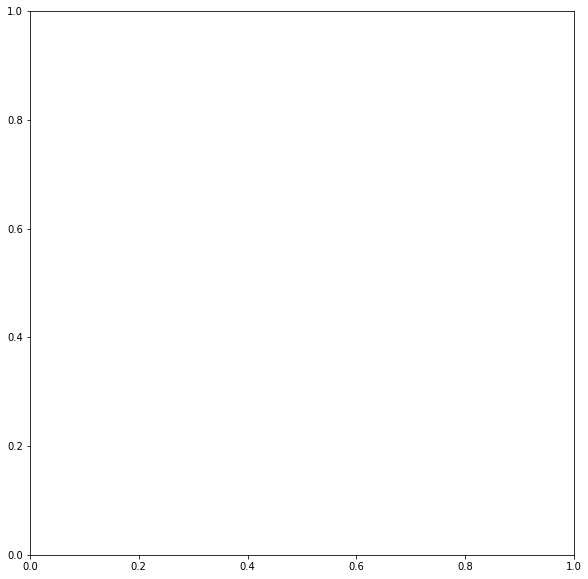

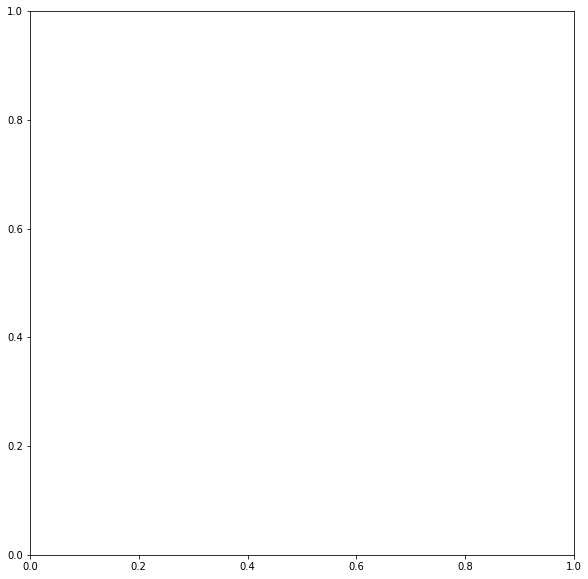

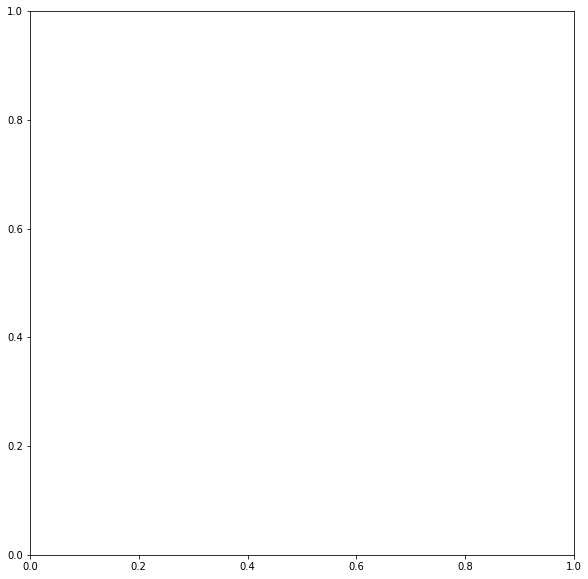

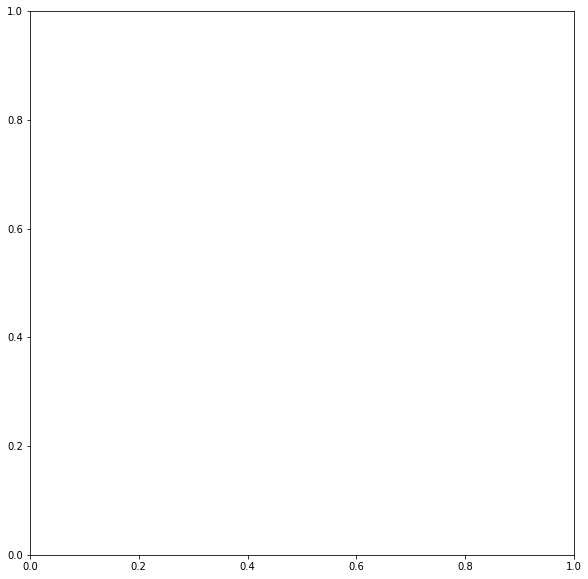

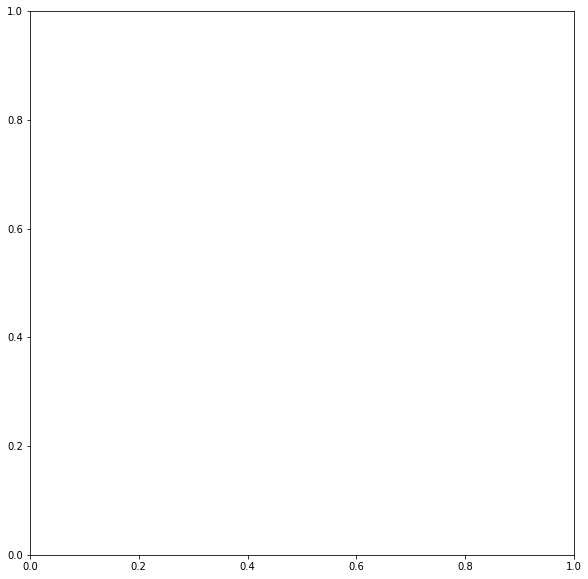

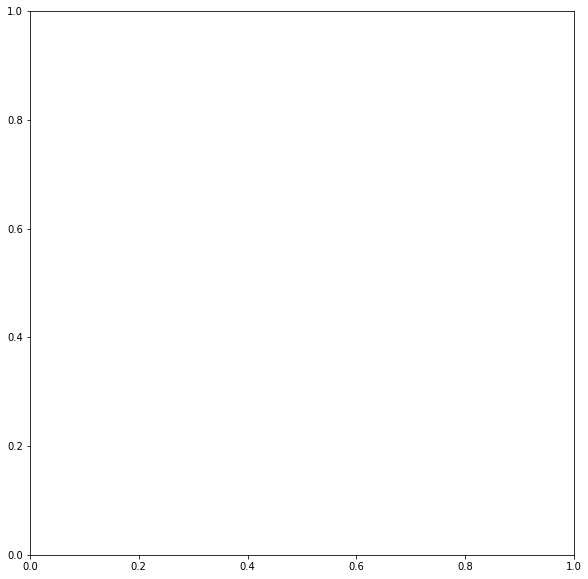

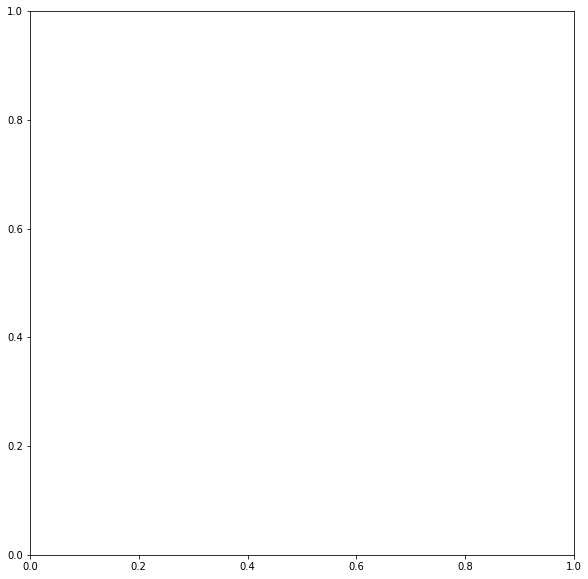

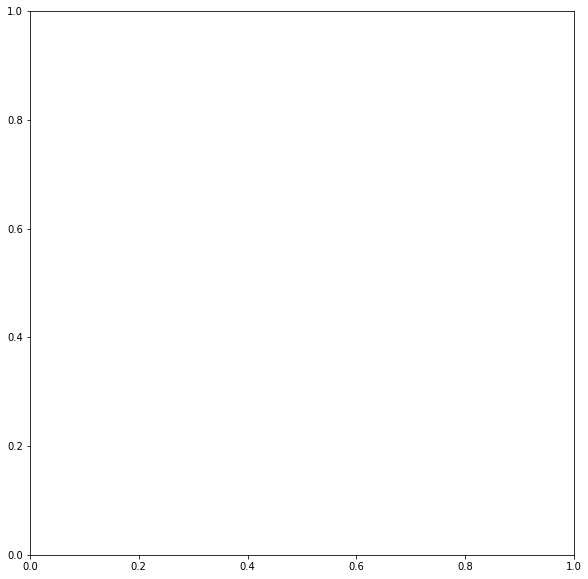

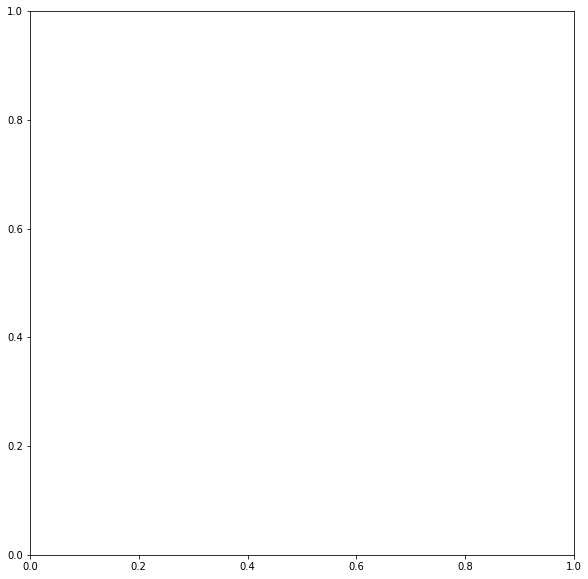

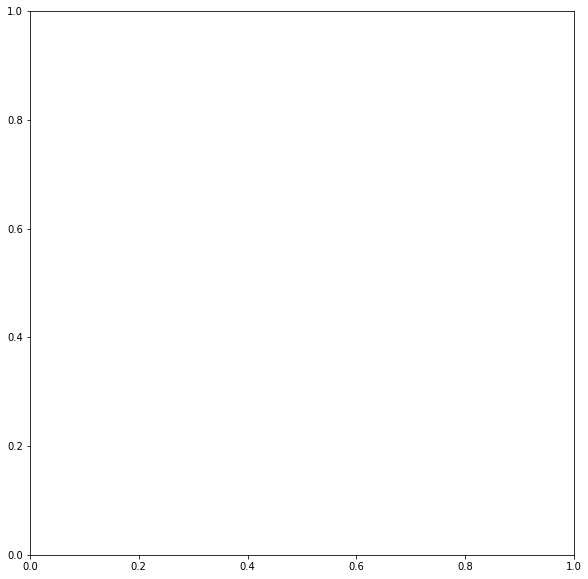

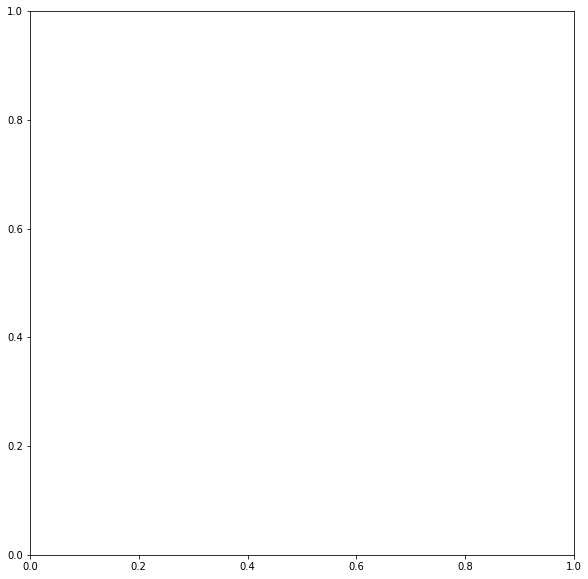

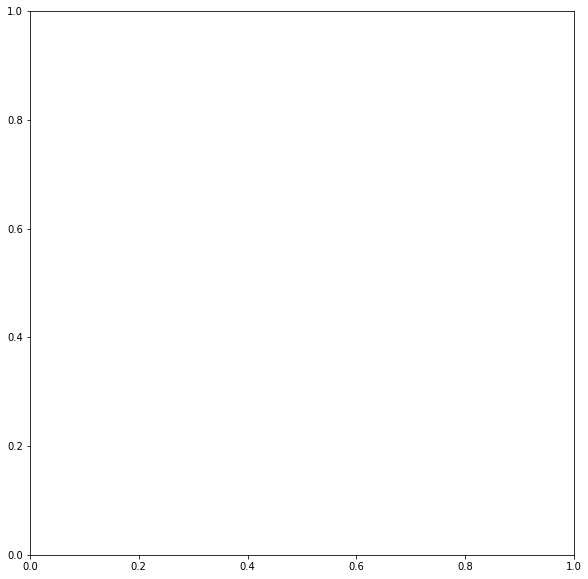

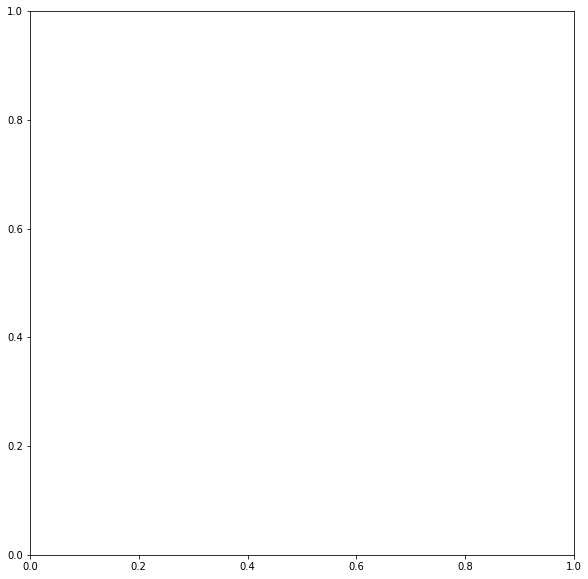

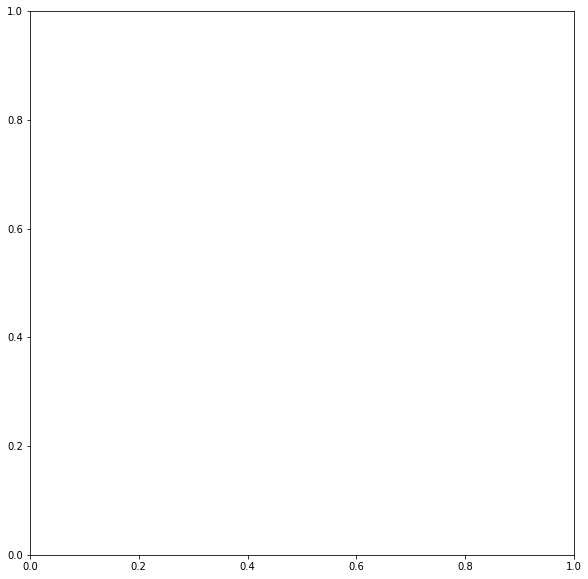

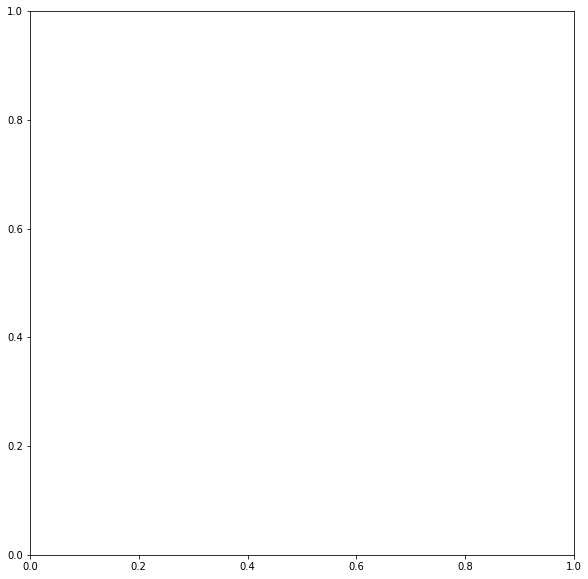

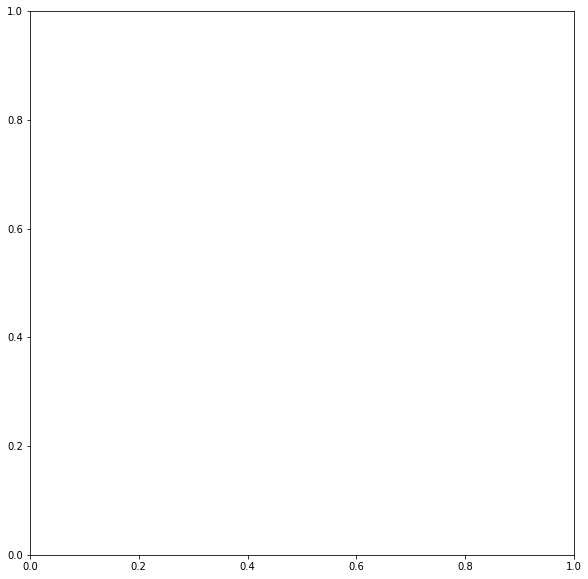

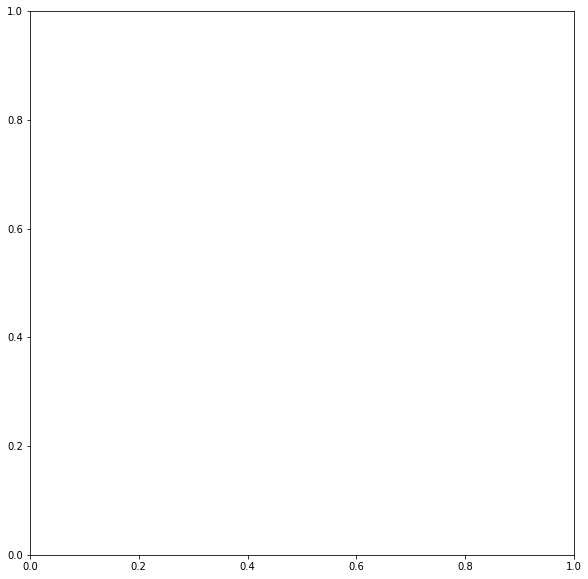

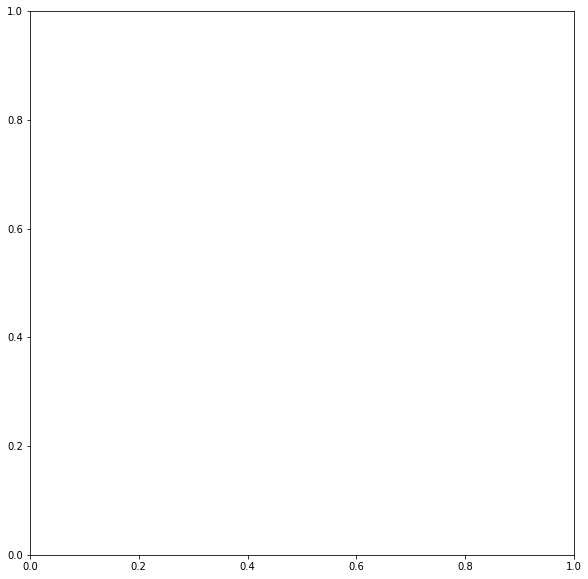

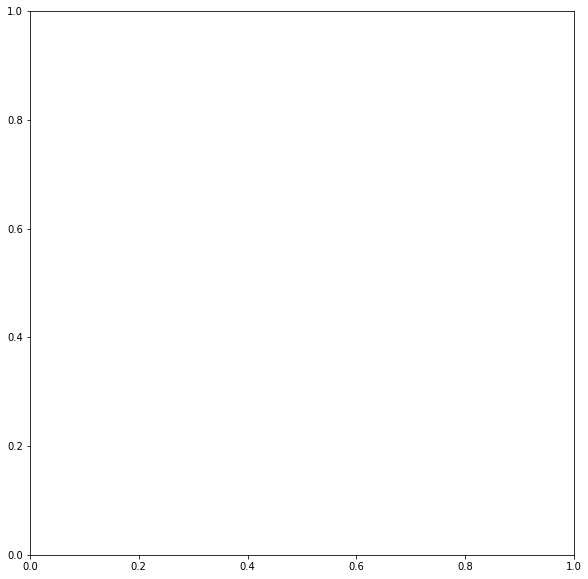

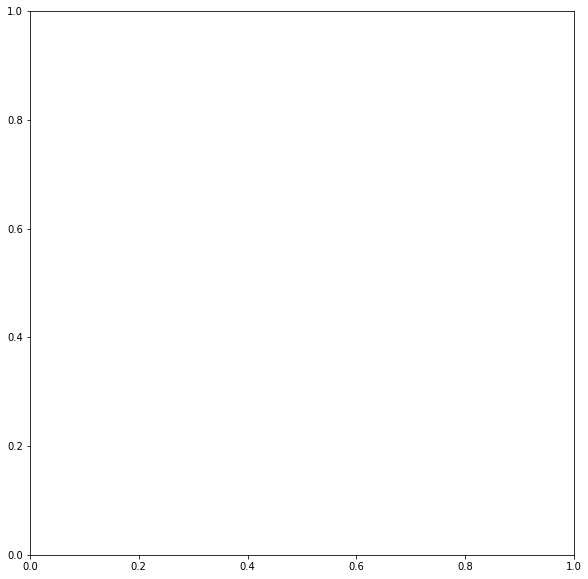

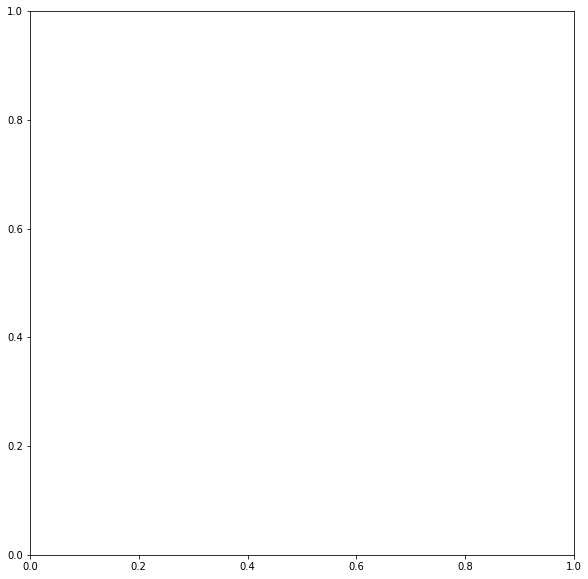

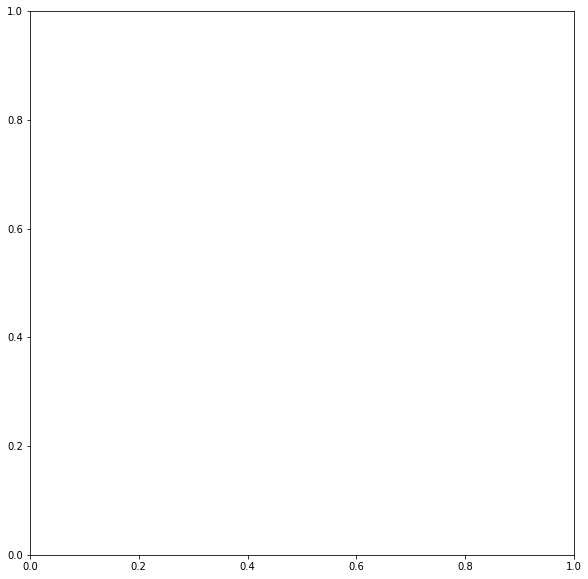

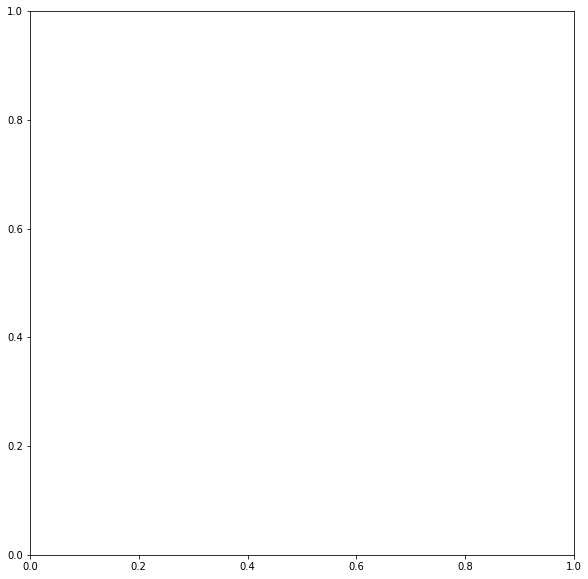

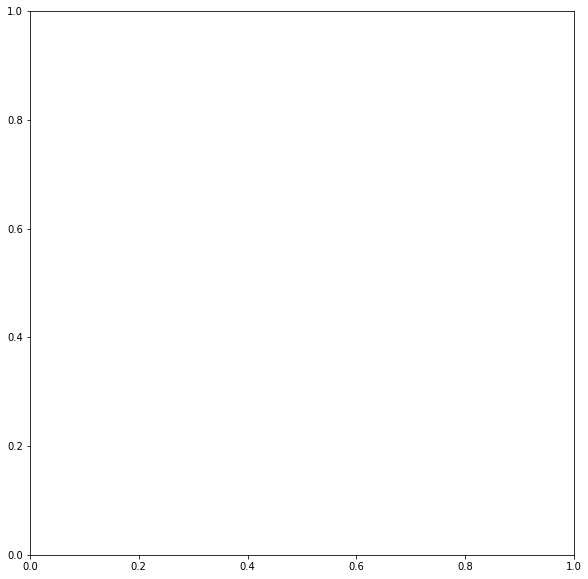

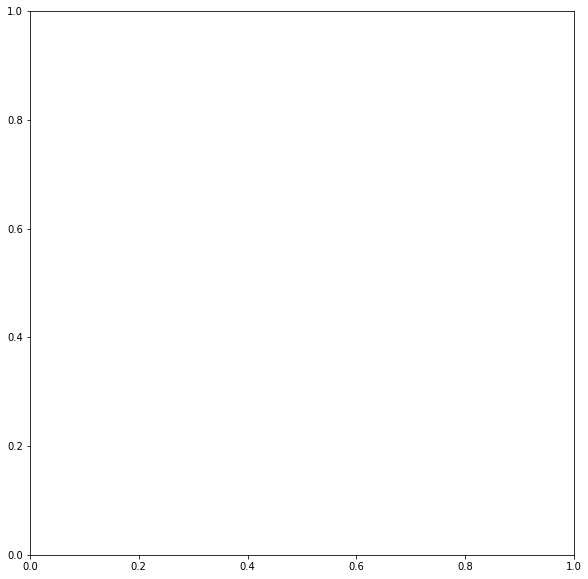

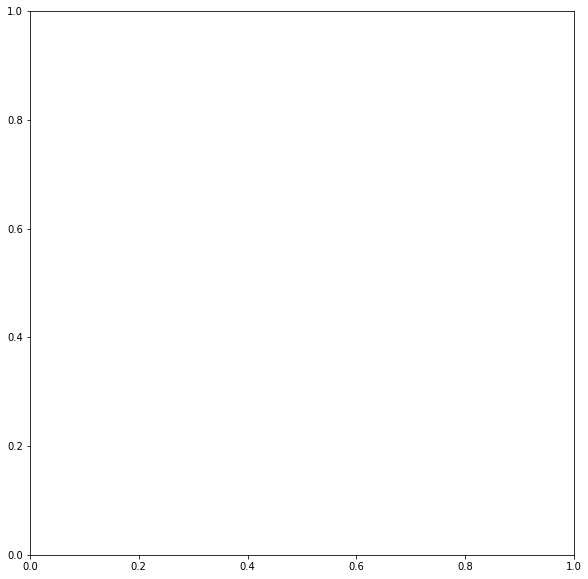

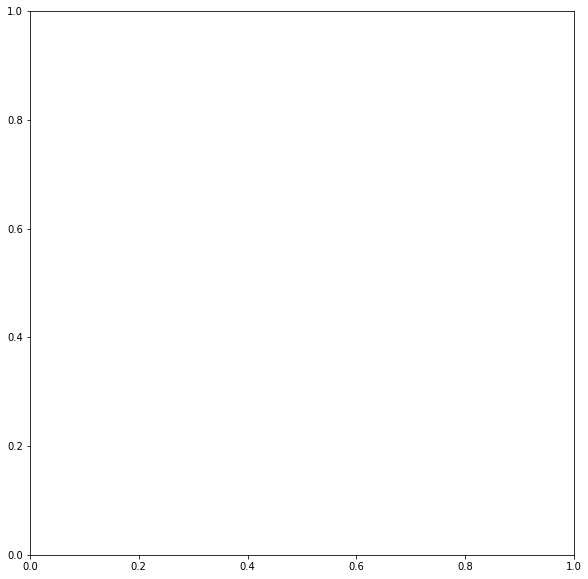

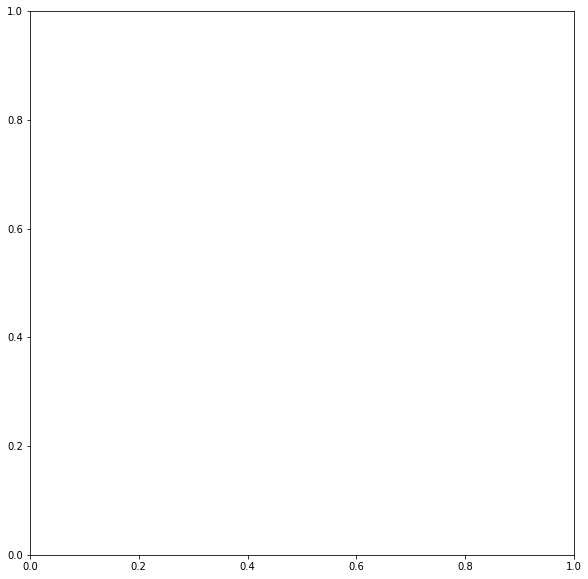

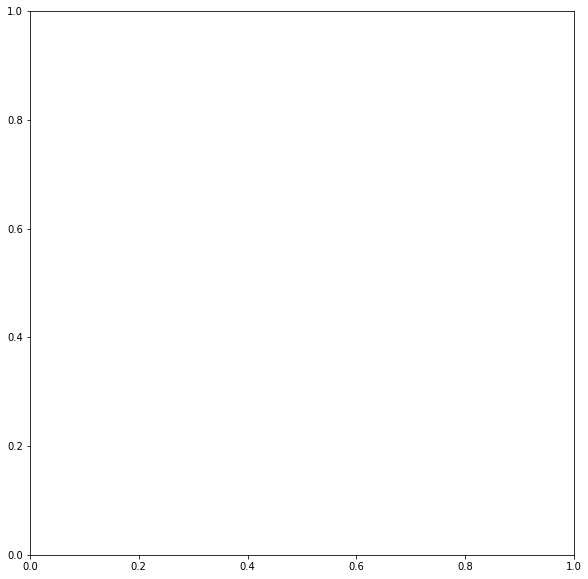

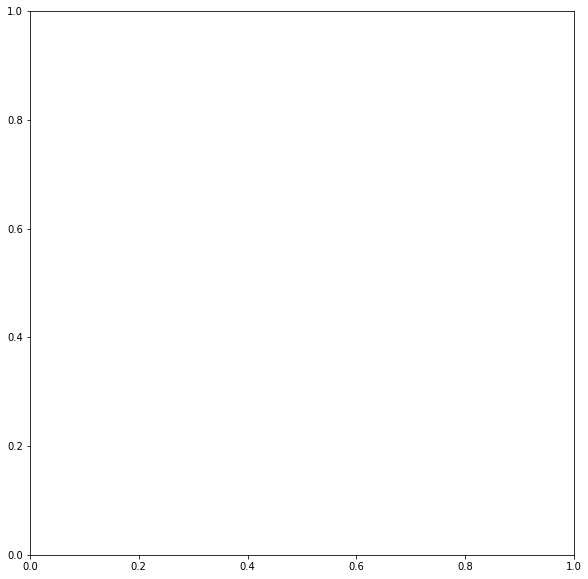

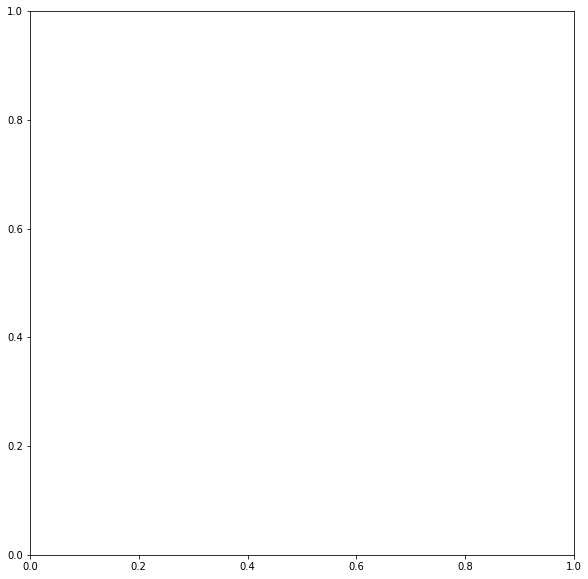

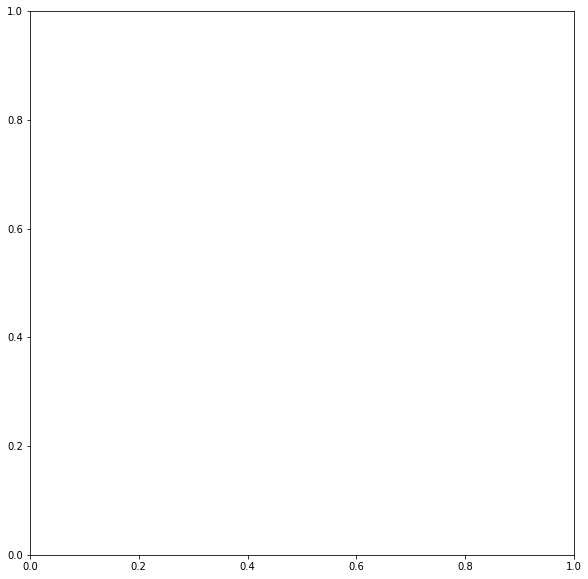

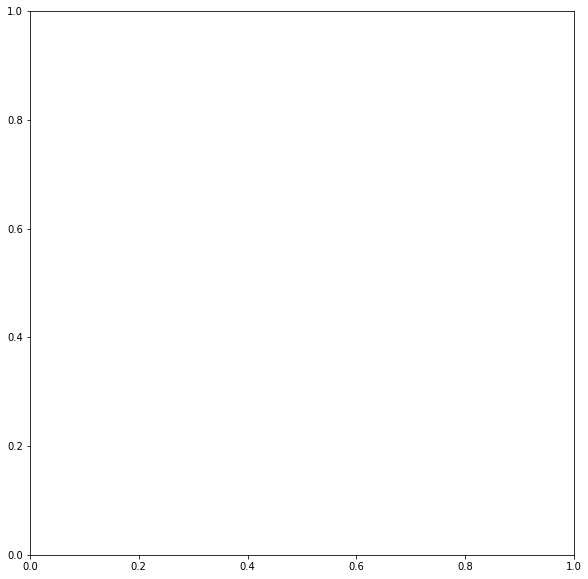

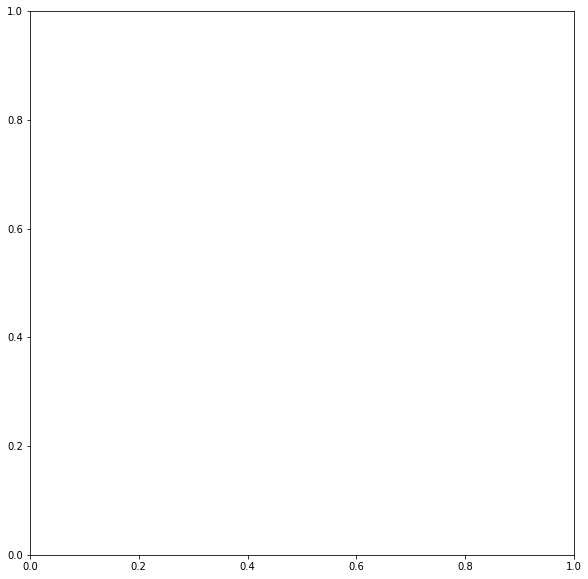

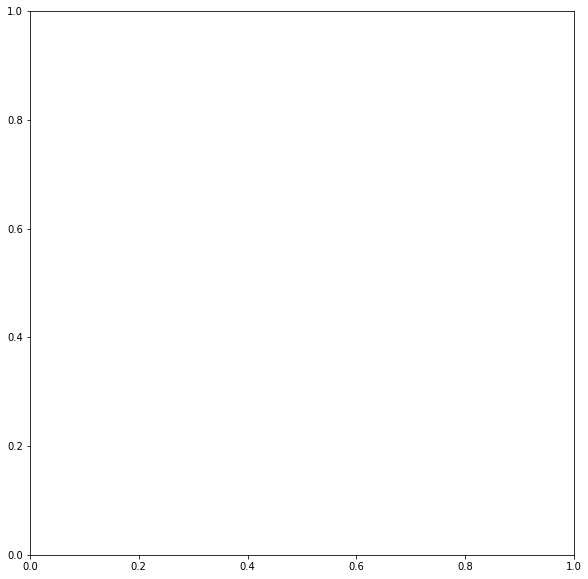

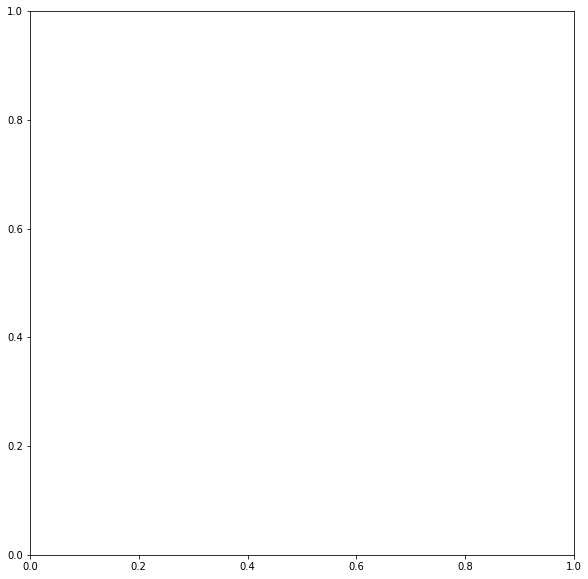

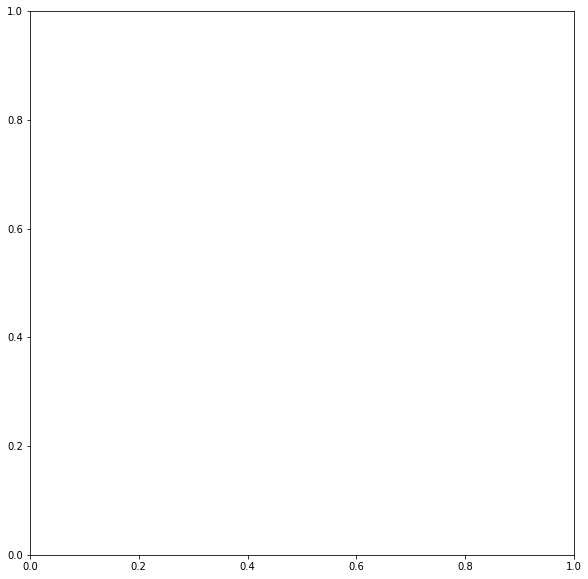

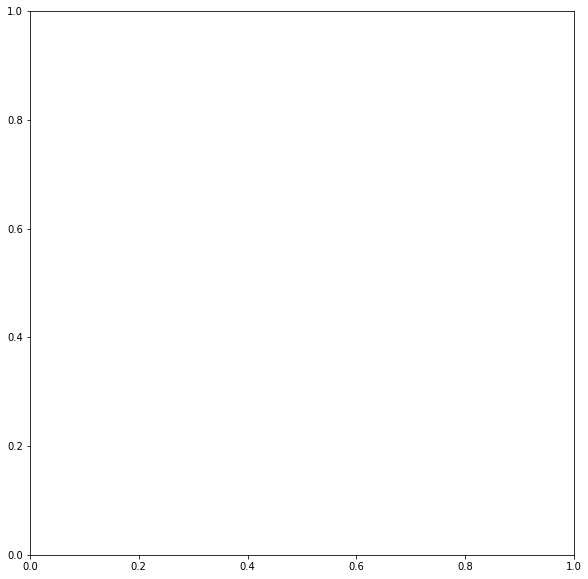

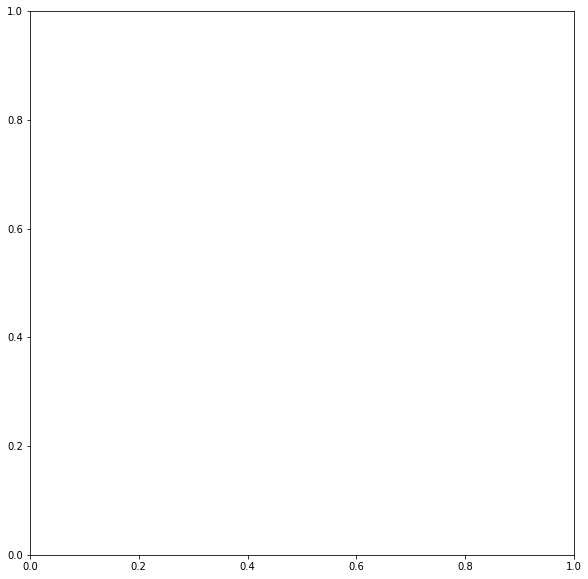

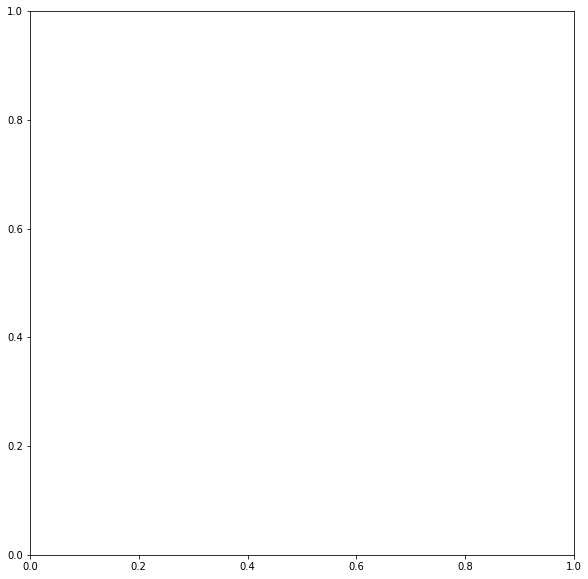

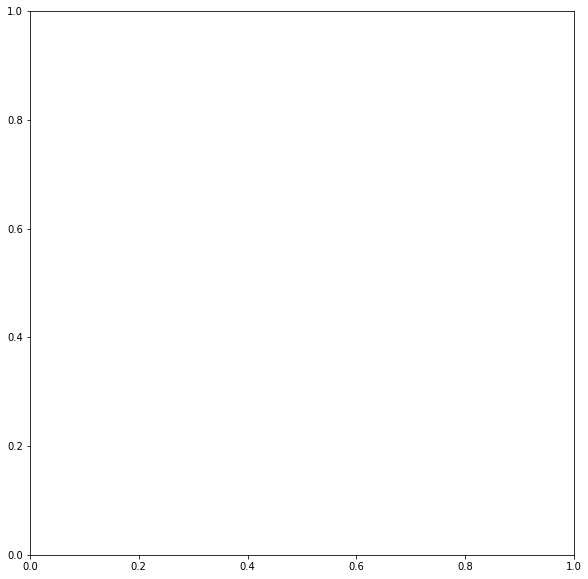

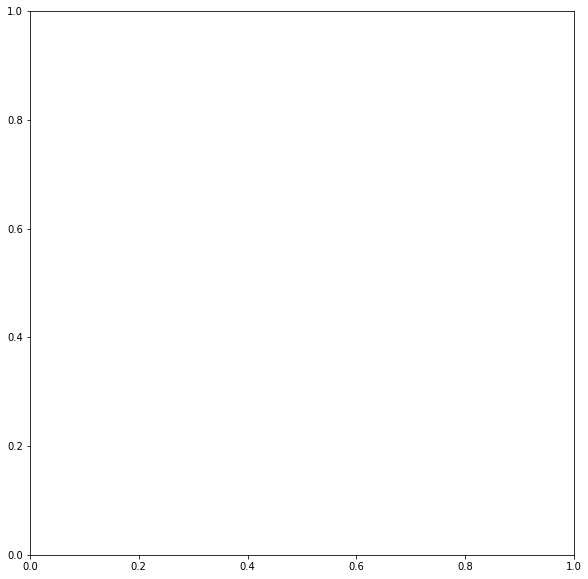

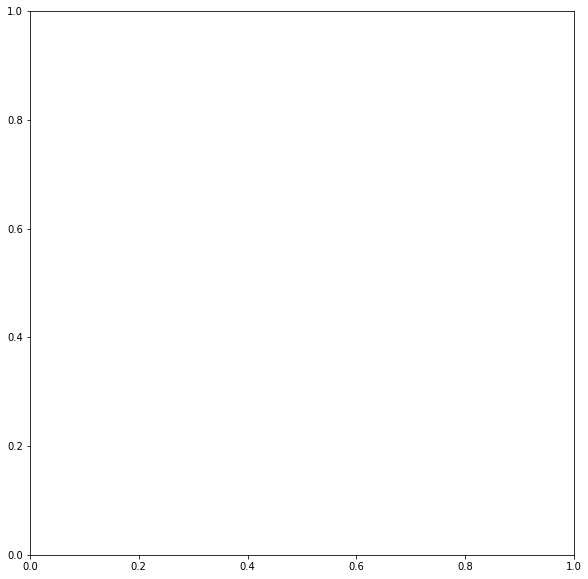

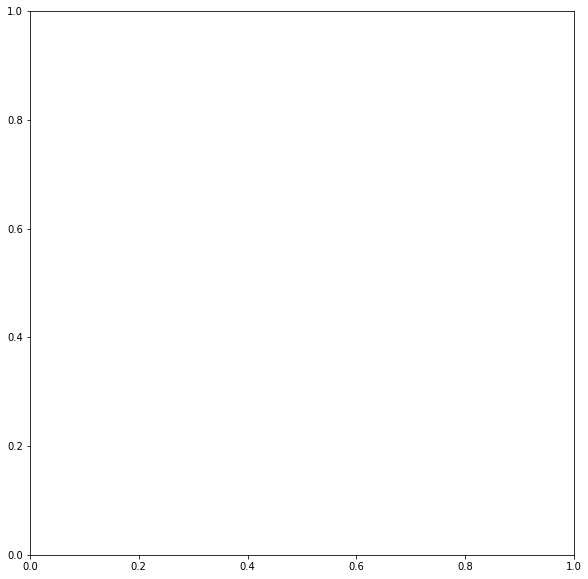

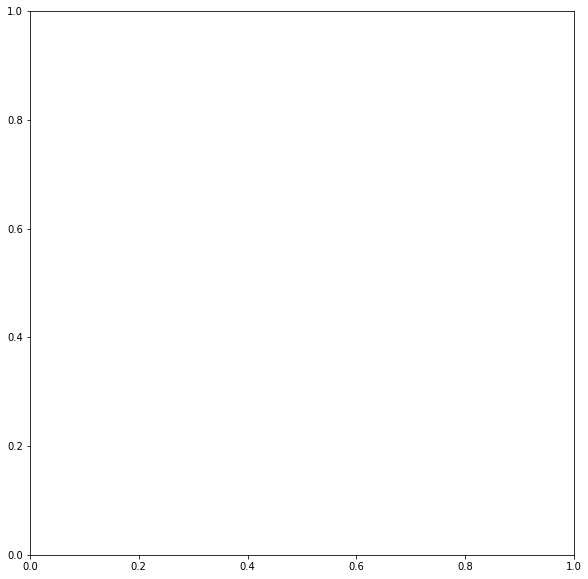

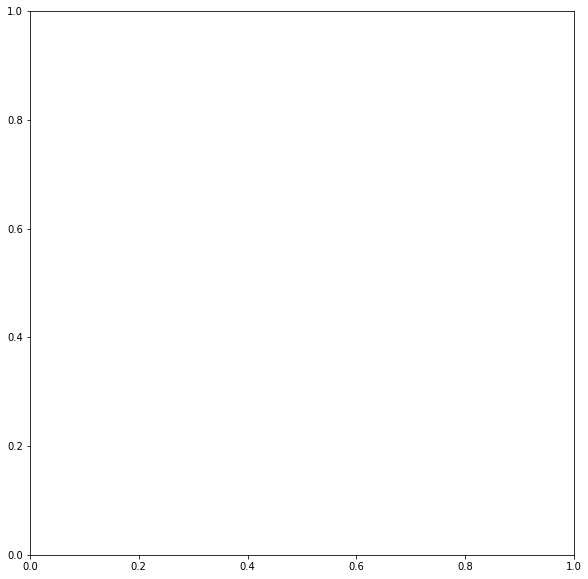

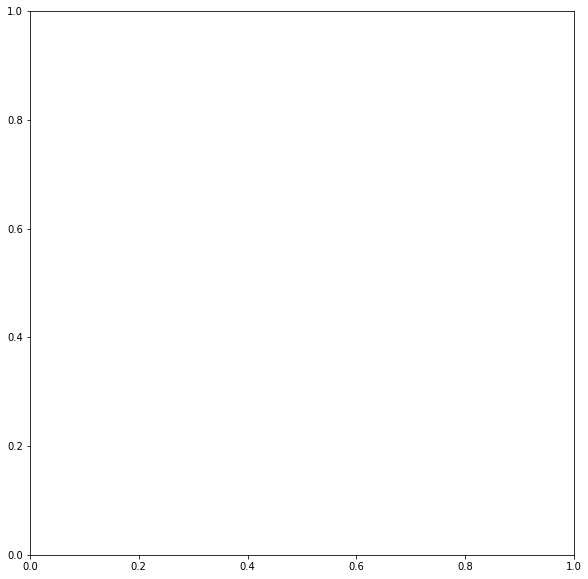

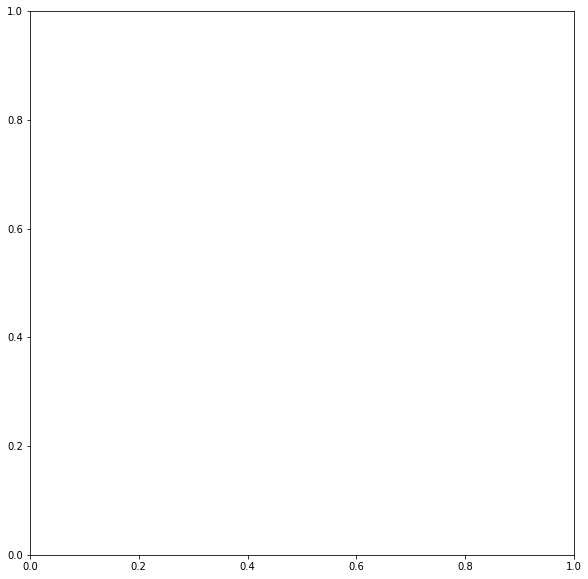

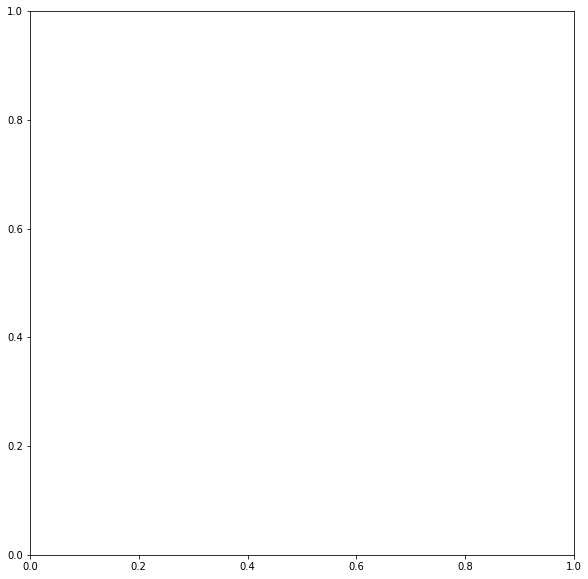

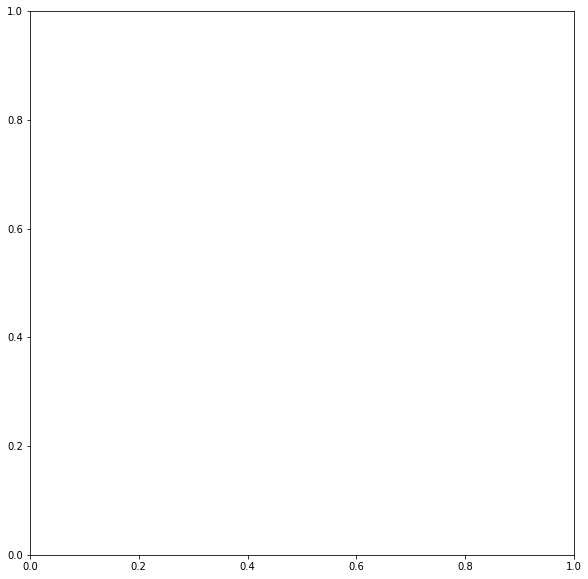

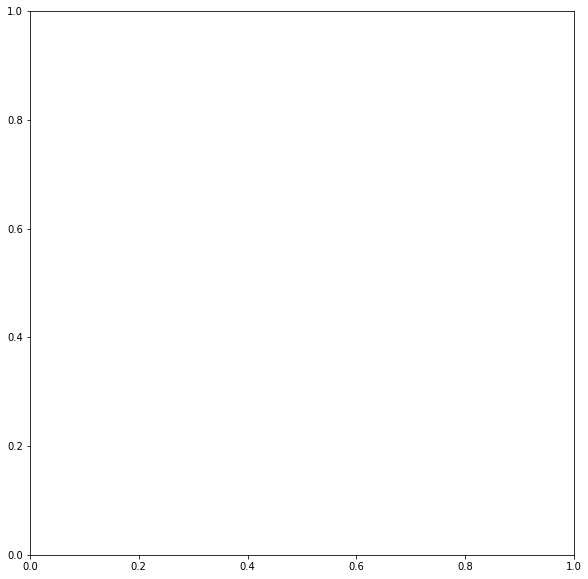

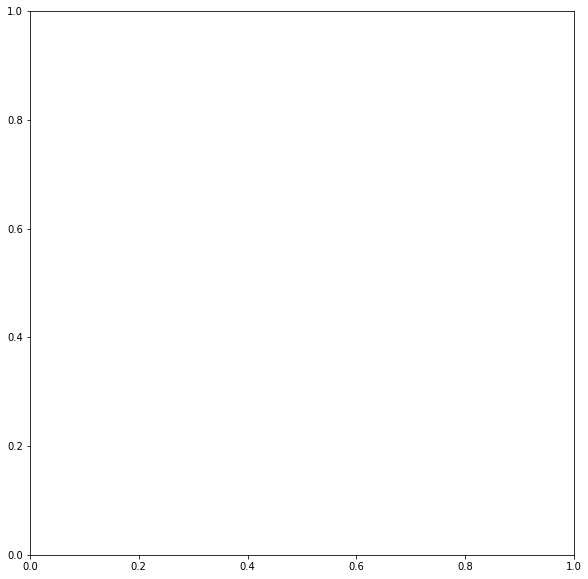

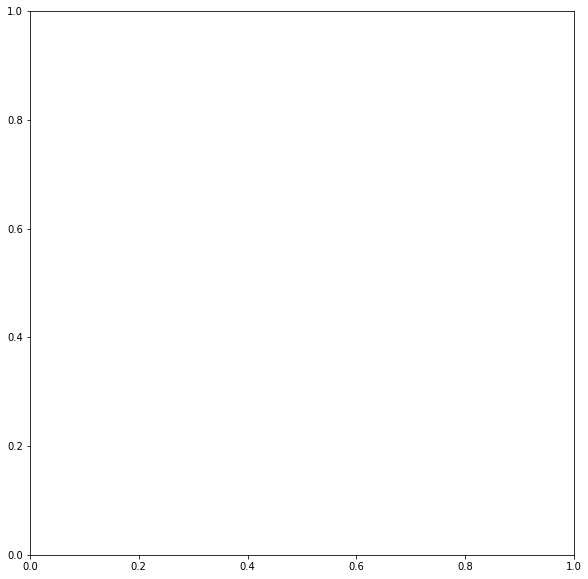

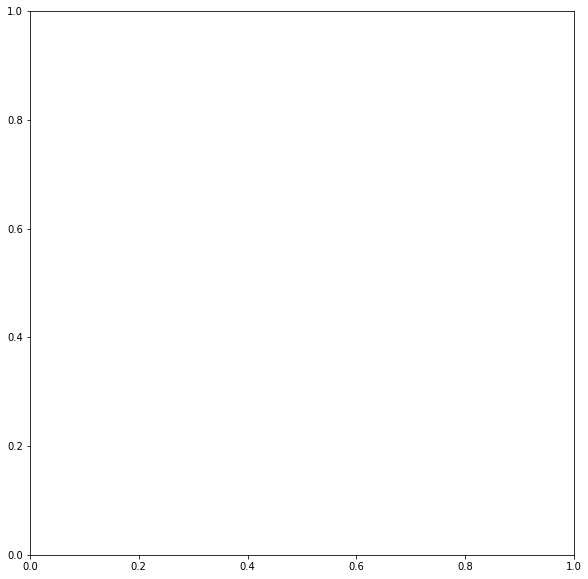

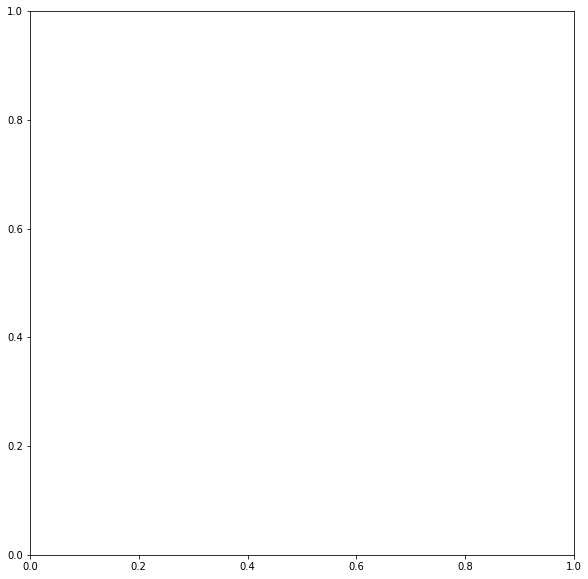

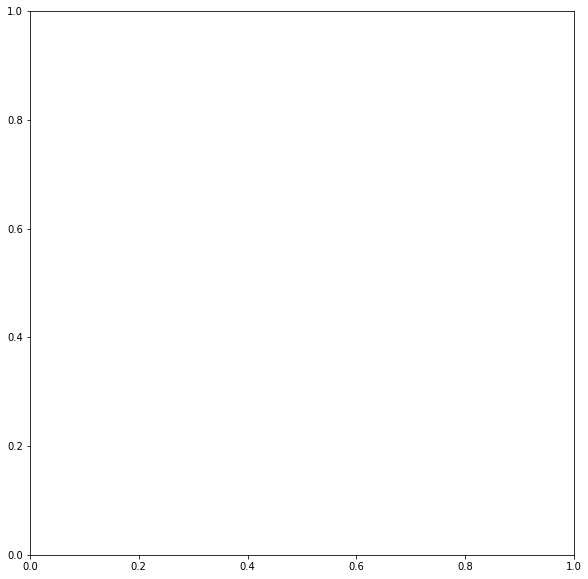

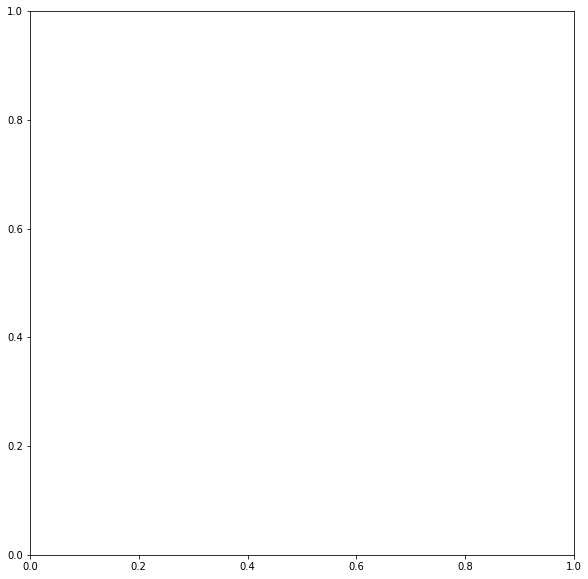

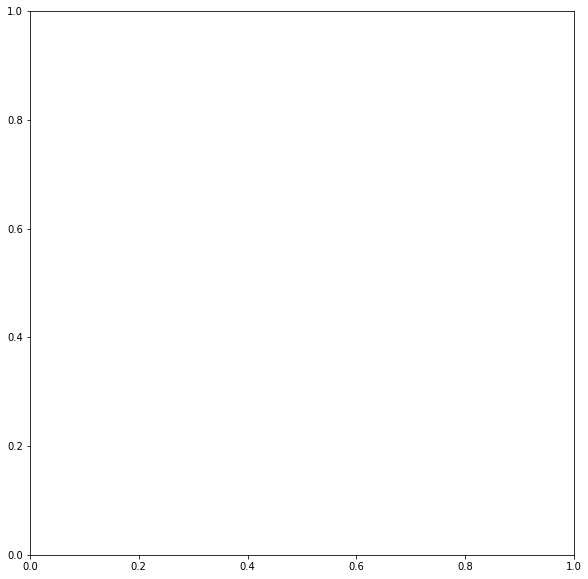

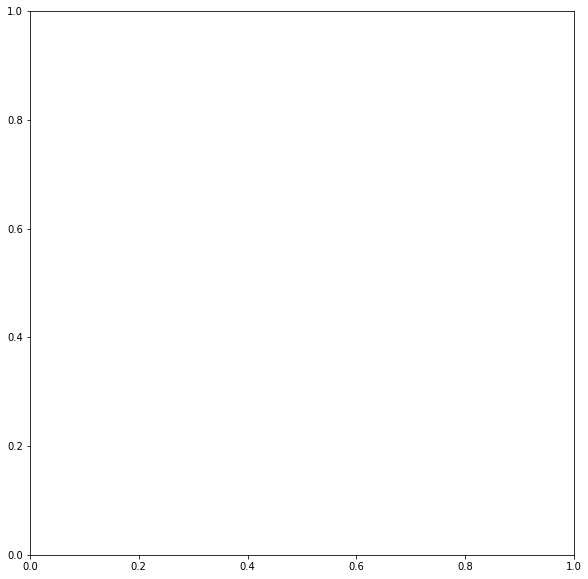

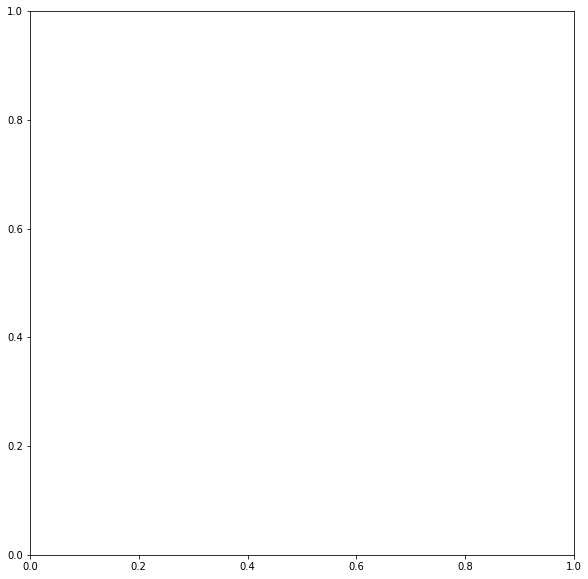

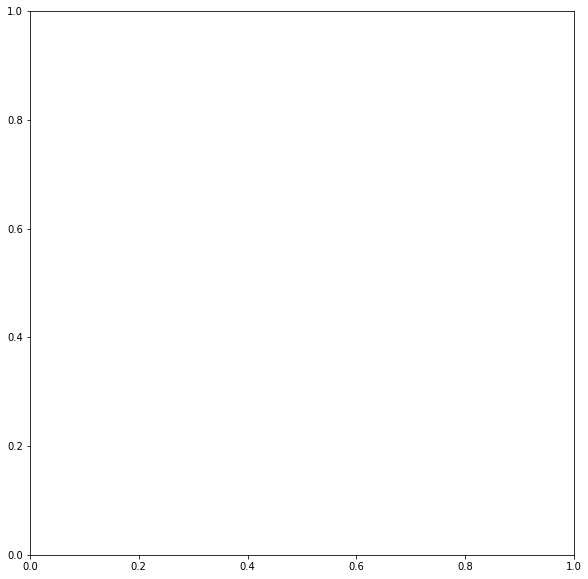

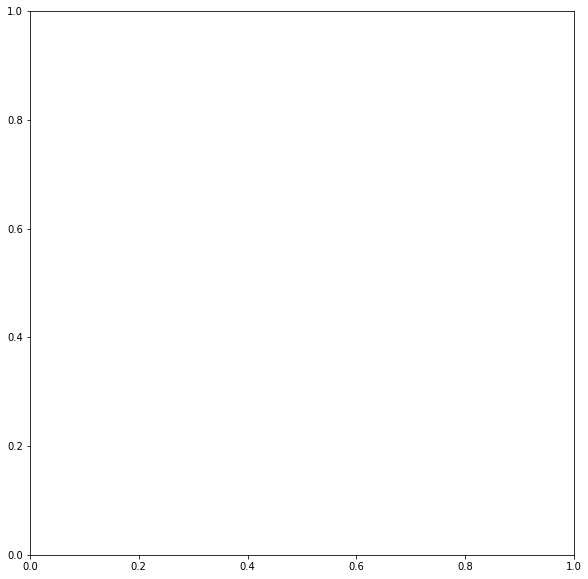

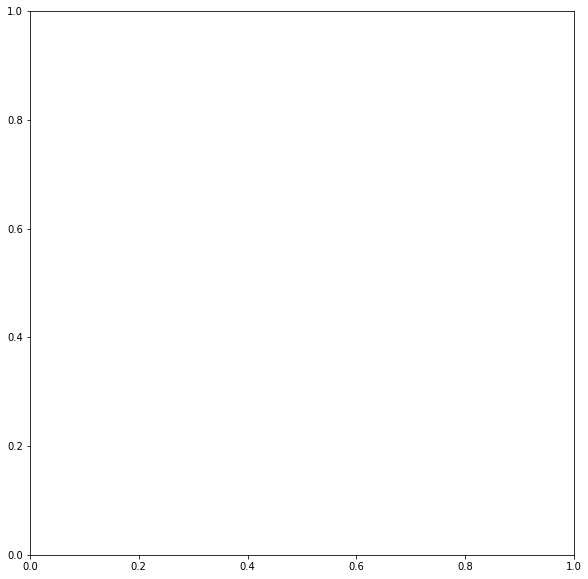

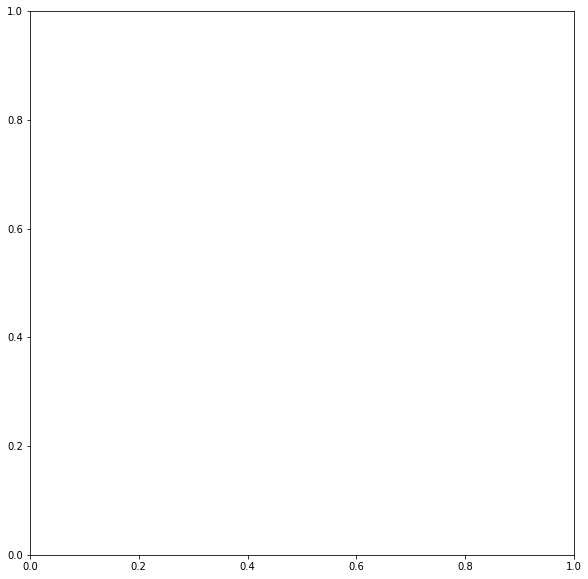

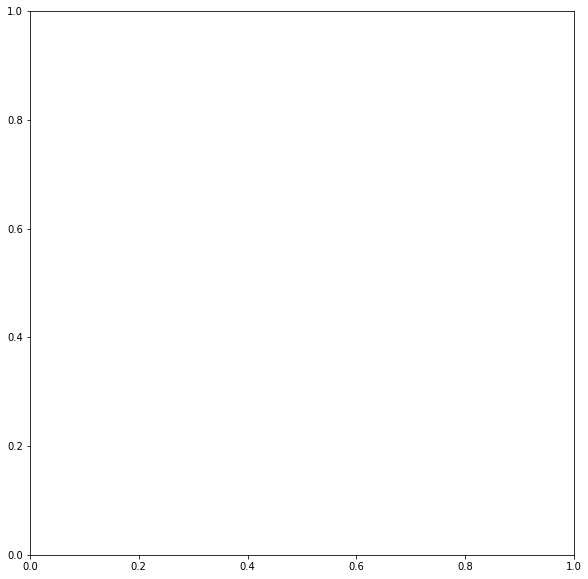

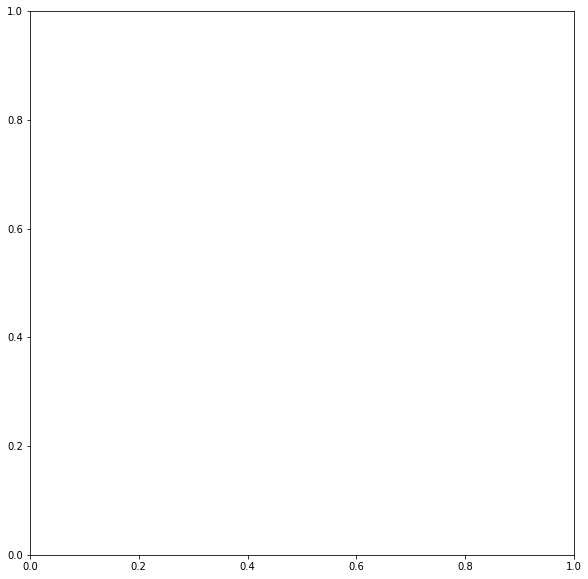

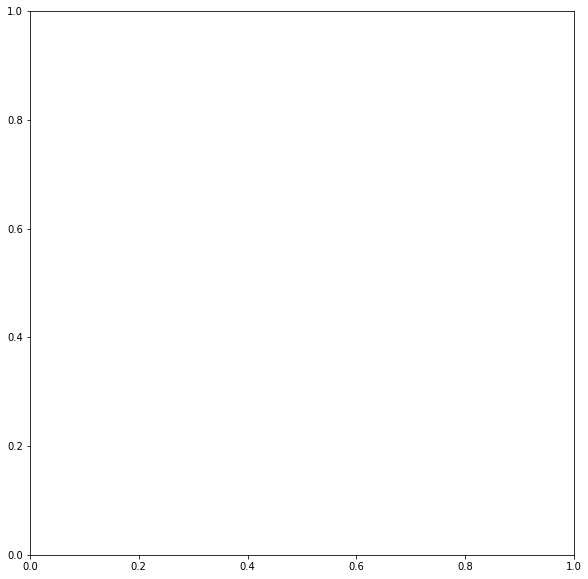

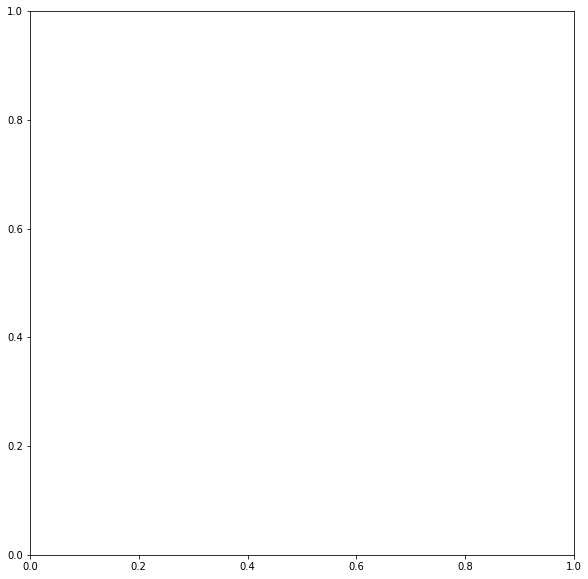

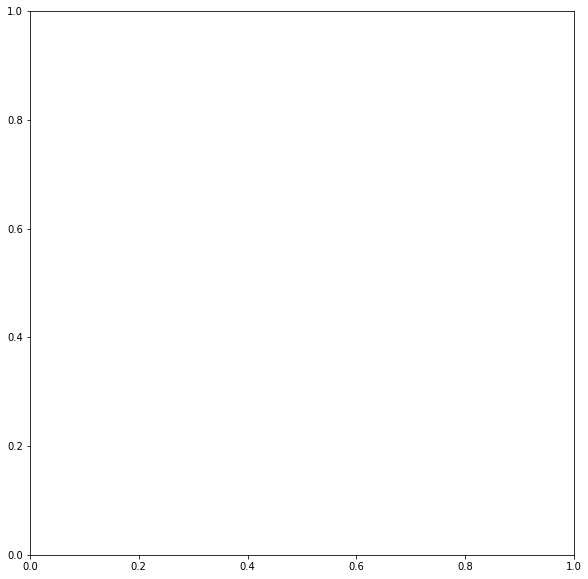

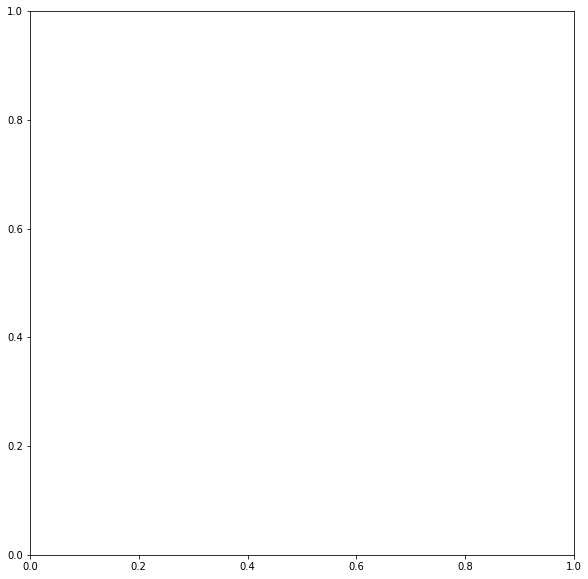

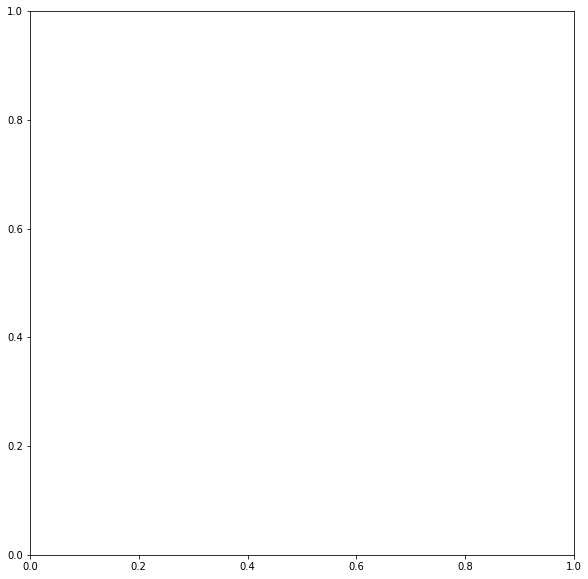

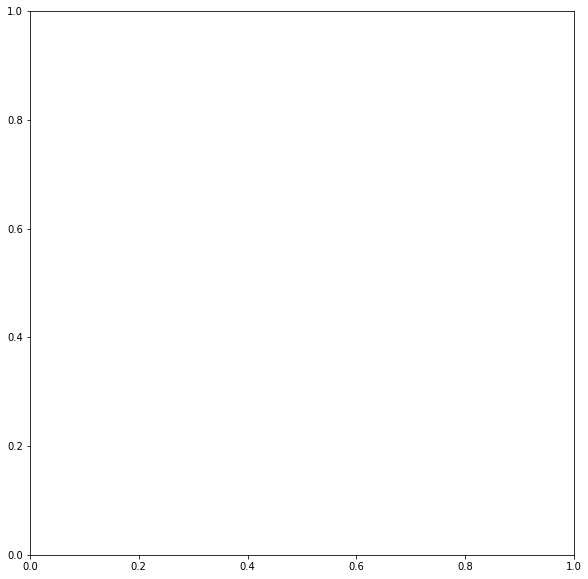

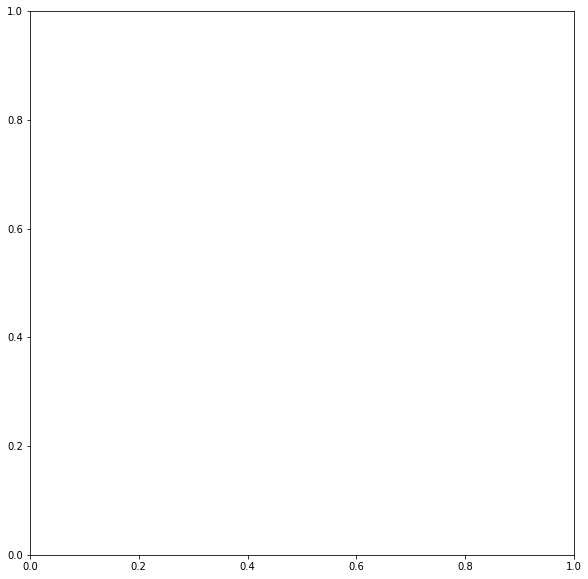

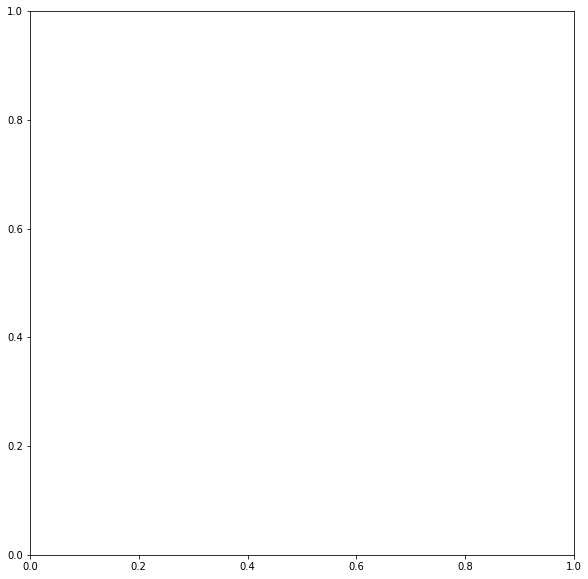

In [194]:
generateImg('Nombre de première injection', '','vaccins-dose1','int')

In [170]:
import matplotlib.pyplot as plt
import matplotlib as mpl


In [189]:
def generateHist(dossier):
    print("Régions")
    for r in df.REG.unique():
        print(r)
        naq = df[df['REG'] == r].DEP.unique()
        dd = databrut[databrut['dep'].isin(naq)]
        dd.n_dose1 = dd.n_dose1.astype(float)
        dd.n_dose2 = dd.n_dose2.astype(float)
        dd.jour = dd.jour.apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d'))
        dd = dd.groupby(['jour'],as_index=False).sum()

        plt.rcParams["figure.figsize"] = (16,8)

        labels = dd.jour
        dose1 = dd.n_dose1
        dose2 = dd.n_dose2
        width = 0.8       # the width of the bars: can also be len(x) sequence

        fig, ax = plt.subplots()

        ax.bar(labels, dose1, width, label='Dose 1',color="#0069CA")
        ax.bar(labels, dose2, width, label='Dose 2',bottom=dose1,color="#060391")

        ax.set_ylabel('Nombre de doses injectées', fontproperties=prop,size="14")
        ax.set_title('Nombre de vaccinés par jour', fontproperties=prop,size="30")
        ax.legend()

        plt.setp(ax.spines.values(), color="#ebebeb")
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        fig.suptitle("\n".join(["Région "+df[df['REG'] == r]['libelle_reg'].iloc[0]]), y=0.85)

        fig.savefig(dossier+'/reg/'+r+'.png', transparent=True)

        plt.close()
        
    print("Départements")
    for r in df.DEP.unique():
        print(r)
        naq = df[df['DEP'] == r].DEP.unique()
        dd = databrut[databrut['dep'].isin(naq)]
        dd.n_dose1 = dd.n_dose1.astype(float)
        dd.n_dose2 = dd.n_dose2.astype(float)
        dd.jour = dd.jour.apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d'))
        dd = dd.groupby(['jour'],as_index=False).sum()

        plt.rcParams["figure.figsize"] = (16,8)

        labels = dd.jour
        dose1 = dd.n_dose1
        dose2 = dd.n_dose2
        width = 0.8       # the width of the bars: can also be len(x) sequence

        fig, ax = plt.subplots()

        ax.bar(labels, dose1, width, label='Dose 1',color="#0069CA")
        ax.bar(labels, dose2, width, label='Dose 2',bottom=dose1,color="#060391")

        ax.set_ylabel('Nombre de doses injectées', fontproperties=prop,size="14")
        ax.set_title('Nombre de vaccinés par jour', fontproperties=prop,size="30")
        ax.legend()

        plt.setp(ax.spines.values(), color="#ebebeb")
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        fig.suptitle("\n".join(["Département "+df[df['DEP'] == r]['LIBELLE'].iloc[0]]), y=0.85)

        fig.savefig(dossier+'/dep/'+r+'.png', transparent=True)
        plt.close()

In [190]:
generateHist('hist-doses')

Régions
84
32
93
44
76
28
75
24
27
53
94
52
11
01
02
03
04
06
Départements
01
02
03
04
05
06
07
08
09
10
11
12
13
14
15
16
17
18
19
21
22
23
24
25
26
27
28
29
2A
2B
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
971
972
973
974
976


In [250]:
databrut2 = pd.read_csv('https://www.data.gouv.fr/fr/datasets/r/535f8686-d75d-43d9-94b3-da8cdf850634',dtype=str,sep=";")

In [292]:
def generateGraph(dossier):
    print("Régions")
    for r in df.REG.unique():
        print(r)
        naq = df[df['REG'] == r].DEP.unique()
        dd = databrut2[databrut2['dep'].isin(naq)]
        dd.n_cum_dose1 = dd.n_cum_dose1.astype(float)
        dd.n_cum_dose2 = dd.n_cum_dose2.astype(float)
        dd.jour = dd.jour.apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d'))
        dd['n_cum'] = dd.n_cum_dose1 + dd.n_cum_dose2
        # Data for plotting
        dd = dd.groupby(['jour','vaccin'],as_index=False).sum()

        plt.rcParams["figure.figsize"] = (16,8)
        fig, ax = plt.subplots()

        x = dd[dd['vaccin'] == '0'].jour
        y = dd[dd['vaccin'] == '0'].n_cum

        ax.plot(x, y,linewidth=1,label='Total')
        plt.fill_between(x, y, color='#0069CA',alpha=0.5)

        x = dd[dd['vaccin'] == '1'].jour
        y = dd[dd['vaccin'] == '1'].n_cum

        ax.plot(x, y,linewidth=4,label='Pfizer',color="#0C1269")

        x = dd[dd['vaccin'] == '2'].jour
        y = dd[dd['vaccin'] == '2'].n_cum

        ax.plot(x, y,linewidth=4,label='Moderna',color="#2D3B3B")

        x = dd[dd['vaccin'] == '3'].jour
        y = dd[dd['vaccin'] == '3'].n_cum

        ax.plot(x, y,linewidth=4,label='AstraZeneka',color="#FFCB00")

        ax.set_ylabel('Nombre de doses injectées', fontproperties=prop,size="14")
        ax.set_title('Nombre de doses par type de vaccin', fontproperties=prop,size="30")
        ax.legend()

        plt.setp(ax.spines.values(), color="#ebebeb")
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        #fig.suptitle

        fig.savefig("test.png")
        #plt.show()

        fig.suptitle("\n".join(["Région "+df[df['REG'] == r]['libelle_reg'].iloc[0]]), y=0.85)

        fig.savefig(dossier+'/reg/'+r+'.png', transparent=True)

        plt.close()
        
    print("Départements")
        
    for r in df.DEP.unique():
        print(r)
        naq = df[df['DEP'] == r].DEP.unique()
        dd = databrut2[databrut2['dep'].isin(naq)]
        dd.n_cum_dose1 = dd.n_cum_dose1.astype(float)
        dd.n_cum_dose2 = dd.n_cum_dose2.astype(float)
        dd.jour = dd.jour.apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d'))
        dd['n_cum'] = dd.n_cum_dose1 + dd.n_cum_dose2
        # Data for plotting
        dd = dd.groupby(['jour','vaccin'],as_index=False).sum()

        plt.rcParams["figure.figsize"] = (16,8)
        fig, ax = plt.subplots()

        x = dd[dd['vaccin'] == '0'].jour
        y = dd[dd['vaccin'] == '0'].n_cum

        ax.plot(x, y,linewidth=1,label='Total')
        plt.fill_between(x, y, color='#0069CA',alpha=0.5)

        x = dd[dd['vaccin'] == '1'].jour
        y = dd[dd['vaccin'] == '1'].n_cum

        ax.plot(x, y,linewidth=4,label='Pfizer',color="#0C1269")

        x = dd[dd['vaccin'] == '2'].jour
        y = dd[dd['vaccin'] == '2'].n_cum

        ax.plot(x, y,linewidth=4,label='Moderna',color="#2D3B3B")

        x = dd[dd['vaccin'] == '3'].jour
        y = dd[dd['vaccin'] == '3'].n_cum

        ax.plot(x, y,linewidth=4,label='AstraZeneka',color="#FFCB00")

        ax.set_ylabel('Nombre de doses injectées', fontproperties=prop,size="14")
        ax.set_title('Nombre de doses par type de vaccin', fontproperties=prop,size="30")
        ax.legend()

        plt.setp(ax.spines.values(), color="#ebebeb")
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        #fig.suptitle

        fig.savefig("test.png")
        #plt.show()

        fig.suptitle("\n".join(["Région "+df[df['DEP'] == r]['LIBELLE'].iloc[0]]), y=0.85)

        fig.savefig(dossier+'/dep/'+r+'.png', transparent=True)

        plt.close()
        

In [293]:
generateGraph("graph-doses")

Régions
84


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



32


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



93


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



44


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



76


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



28


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



75


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



24


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



27


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



53


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



94


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



52


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



11


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



01


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



02


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



03


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



04


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



06


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Départements
01


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



02


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



03


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



04


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



05


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



06


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



07


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



08


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



09


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



10


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



11


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



12


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



13


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



14


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



15


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



16


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



17


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



18


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



19


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



21


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



22


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



23


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



24


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



25


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



26


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



27


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



28


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



29


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



2A


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



2B


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



30


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



31


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



32


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



33


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



34


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



35


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



36


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



37


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



38


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



39


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



40


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



41


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



42


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



43


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



44


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



45


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



46


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



47


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



48


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



49


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



50


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



51


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



52


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



53


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



54


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



55


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



56


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



57


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



58


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



59


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



60


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



61


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



62


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



63


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



64


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



65


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



66


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



67


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



68


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



69


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



70


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



71


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



72


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



73


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



74


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



75


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



76


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



77


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



78


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



79


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



80


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



81


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



82


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



83


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



84


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



85


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



86


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



87


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



88


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



89


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



90


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



91


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



92


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



93


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



94


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



95


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



971


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



972


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



973


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



974


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



976


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [284]:
databrut3= pd.read_csv('https://www.data.gouv.fr/fr/datasets/r/c0693f46-9980-4a80-9111-f7e6f0f2539c',dtype=str,sep=";")

In [308]:
def generateGender(dossier):
    print("Régions")
    for r in df.REG.unique():
        print(r)
        naq = df[df['REG'] == r].DEP.unique()
        dd = databrut3[databrut3['dep'].isin(naq)]
        dd.n_tot_dose1 = dd.n_tot_dose1.astype(float)
        dd.n_tot_dose2 = dd.n_tot_dose2.astype(float)
        dd.jour = dd.jour.apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d'))
        dd['n_cum'] = dd.n_tot_dose1 + dd.n_tot_dose2
        
        plt.rcParams["figure.figsize"] = (16,8)

        width = 0.8       # the width of the bars: can also be len(x) sequence
        fig, ax = plt.subplots()

        dd = dd.groupby(['jour','sexe'],as_index=False).sum()

        labels = ['Homme','Femme']
        cumul = [dd[dd['sexe'] == '1'].n_cum.iloc[0],dd[dd['sexe'] == '2'].n_cum.iloc[0]]
        ax.barh(labels, cumul, width, label='Répartition par sexe',color="#0C1269")

        ax.set_ylabel('Sexe', fontproperties=prop,size="14")
        ax.set_title('Répartition Homme / Femme', fontproperties=prop,size="30")
        ax.legend()

        plt.setp(ax.spines.values(), color="#ebebeb")
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        
        fig.suptitle("\n".join(["Région "+df[df['REG'] == r]['libelle_reg'].iloc[0]]), y=0.95,x=0.1)

        fig.savefig(dossier+'/reg/'+r+'.png', transparent=True)

        plt.close()
        
    print("Départements")
    for r in df.DEP.unique():
        print(r)
        naq = df[df['DEP'] == r].DEP.unique()
        dd = databrut3[databrut3['dep'].isin(naq)]
        dd.n_tot_dose1 = dd.n_tot_dose1.astype(float)
        dd.n_tot_dose2 = dd.n_tot_dose2.astype(float)
        dd.jour = dd.jour.apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d'))
        dd['n_cum'] = dd.n_tot_dose1 + dd.n_tot_dose2
        
        plt.rcParams["figure.figsize"] = (16,8)

        width = 0.8       # the width of the bars: can also be len(x) sequence
        fig, ax = plt.subplots()

        dd = dd.groupby(['jour','sexe'],as_index=False).sum()

        labels = ['Homme','Femme']
        cumul = [dd[dd['sexe'] == '1'].n_cum.iloc[0],dd[dd['sexe'] == '2'].n_cum.iloc[0]]
        ax.barh(labels, cumul, width, label='Répartition par sexe',color="#0C1269")

        ax.set_ylabel('Sexe', fontproperties=prop,size="14")
        ax.set_title('Répartition Homme / Femme', fontproperties=prop,size="30")
        ax.legend()

        plt.setp(ax.spines.values(), color="#ebebeb")
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        
        fig.suptitle("\n".join(["Région "+df[df['DEP'] == r]['LIBELLE'].iloc[0]]), y=0.95,x=0.1)

        fig.savefig(dossier+'/dep/'+r+'.png', transparent=True)

        plt.close()
        

In [309]:
generateGender('hist-gender')

Régions
84
32


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



93
44
76
28
75
24
27
53
94
52
11
01
02
03
04
06
Départements
01
02


/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:45: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



03
04
05
06
07
08
09
10
11
12
13
14
15
16
17
18
19
21
22
23
24
25
26
27
28
29
2A
2B
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
971
972
973
974
976


In [285]:
dd = databrut3[databrut3['dep'].isin(['75','92'])]
dd.n_tot_dose1 = dd.n_tot_dose1.astype(float)
dd.n_tot_dose2 = dd.n_tot_dose2.astype(float)
dd.jour = dd.jour.apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d'))
dd['n_cum'] = dd.n_tot_dose1 + dd.n_tot_dose2

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



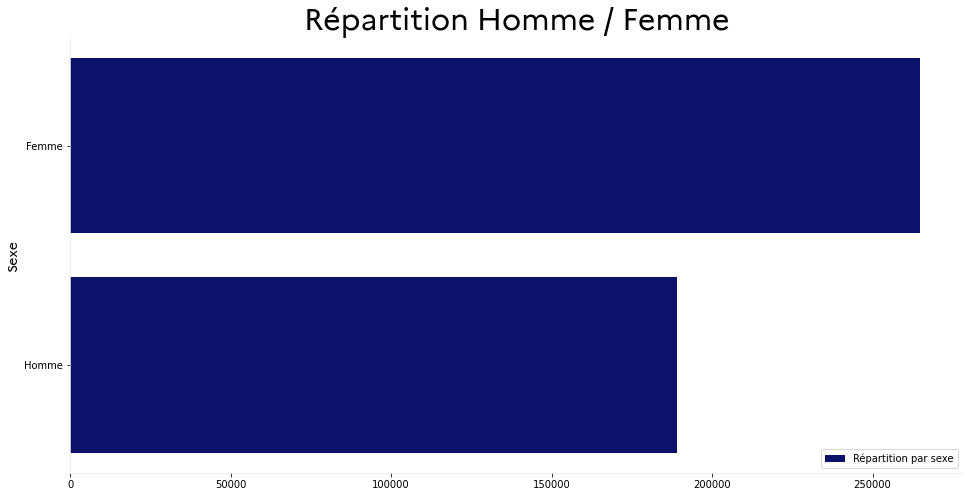

In [296]:
plt.rcParams["figure.figsize"] = (16,8)

width = 0.8       # the width of the bars: can also be len(x) sequence
fig, ax = plt.subplots()

dd = dd.groupby(['jour','sexe'],as_index=False).sum()

labels = ['Homme','Femme']
cumul = [dd[dd['sexe'] == '1'].n_cum.iloc[0],dd[dd['sexe'] == '2'].n_cum.iloc[0]]
ax.barh(labels, cumul, width, label='Répartition par sexe',color="#0C1269")

ax.set_ylabel('Sexe', fontproperties=prop,size="14")
ax.set_title('Répartition Homme / Femme', fontproperties=prop,size="30")
ax.legend()

plt.setp(ax.spines.values(), color="#ebebeb")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

In [339]:
databrut4 = pd.read_csv("https://www.data.gouv.fr/fr/datasets/r/de4b356b-8cd9-4b9a-8878-459a62646107",dtype=str,sep=";")

In [340]:
ages = {
    '9' : '0-9',
    '17' : '10-17',
    '24' : '18-24',
    '29' : '25-29',
    '39' : '30-39',
    '49' : '40-49',
    '59' : '50-59',
    '69' : '60-69',
    '74' : '70-74',
    '79' : '75-79',
    '80' : '80 et +'
}

In [351]:
def generateAges(dossier):
    print("Régions")
    for r in df.REG.unique():
        print(r)
        naq = df[df['REG'] == r].DEP.unique()
        dd = databrut4[databrut4['dep'].isin(naq)]
        dd.n_tot_dose1 = dd.n_tot_dose1.astype(float)
        dd.n_tot_dose2 = dd.n_tot_dose2.astype(float)
        dd.jour = dd.jour.apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d'))
        dd['n_cum'] = dd.n_tot_dose1 + dd.n_tot_dose2
        dd.clage_vacsi = dd.clage_vacsi.apply(lambda x: ages[x] if x in ages else x)
        plt.rcParams["figure.figsize"] = (16,8)

        width = 0.8       # the width of the bars: can also be len(x) sequence
        fig, ax = plt.subplots()

        dd = dd.groupby(['jour','clage_vacsi'],as_index=False).sum()
        dd = dd[dd['clage_vacsi'] != '0']
        labels = dd.clage_vacsi
        cumul = dd.n_cum
        ax.bar(labels, cumul, width,color="#0C1269")

        ax.set_ylabel('Nombre de doses injectées', fontproperties=prop,size="14")
        ax.set_title('Répartition par tranche d\'âge', fontproperties=prop,size="30")
        ax.legend()

        plt.setp(ax.spines.values(), color="#ebebeb")
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)

        fig.suptitle("\n".join(["Région "+df[df['REG'] == r]['libelle_reg'].iloc[0]]), y=0.95,x=0.1)

        fig.savefig(dossier+'/reg/'+r+'.png', transparent=True)

        plt.close()
        
    print("Départements")
    
    for r in df.DEP.unique():
        print(r)
        naq = df[df['DEP'] == r].DEP.unique()
        dd = databrut4[databrut4['dep'].isin(naq)]
        dd.n_tot_dose1 = dd.n_tot_dose1.astype(float)
        dd.n_tot_dose2 = dd.n_tot_dose2.astype(float)
        dd.jour = dd.jour.apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d'))
        dd['n_cum'] = dd.n_tot_dose1 + dd.n_tot_dose2
        dd.clage_vacsi = dd.clage_vacsi.apply(lambda x: ages[x] if x in ages else x)
        plt.rcParams["figure.figsize"] = (16,8)

        width = 0.8       # the width of the bars: can also be len(x) sequence
        fig, ax = plt.subplots()

        dd = dd.groupby(['jour','clage_vacsi'],as_index=False).sum()
        dd = dd[dd['clage_vacsi'] != '0']
        labels = dd.clage_vacsi
        cumul = dd.n_cum
        ax.bar(labels, cumul, width,color="#0C1269")

        ax.set_ylabel('Nombre de doses injectées', fontproperties=prop,size="14")
        ax.set_title('Répartition par tranche d\'âge', fontproperties=prop,size="30")
        ax.legend()

        plt.setp(ax.spines.values(), color="#ebebeb")
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)

        fig.suptitle("\n".join(["Région "+df[df['DEP'] == r]['LIBELLE'].iloc[0]]), y=0.95,x=0.1)

        fig.savefig(dossier+'/dep/'+r+'.png', transparent=True)

        plt.close()
        
        

In [352]:
generateAges('hist-ages')

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

No handles with labels found to put in legend.


Régions
84
32


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


93
44


No handles with labels found to put in legend.
No handles with labels found to put in legend.


76
28


No handles with labels found to put in legend.
No handles with labels found to put in legend.


75
24
27


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


53
94


No handles with labels found to put in legend.
No handles with labels found to put in legend.


52
11


No handles with labels found to put in legend.
No handles with labels found to put in legend.


01
02


No handles with labels found to put in legend.
No handles with labels found to put in legend.


03
04


No handles with labels found to put in legend.
/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:46: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

No handles with labels found to put in legend.


06
Départements
01


No handles with labels found to put in legend.
No handles with labels found to put in legend.


02
03


No handles with labels found to put in legend.
No handles with labels found to put in legend.


04
05


No handles with labels found to put in legend.
No handles with labels found to put in legend.


06
07


No handles with labels found to put in legend.
No handles with labels found to put in legend.


08
09


No handles with labels found to put in legend.


10
11


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


12
13


No handles with labels found to put in legend.
No handles with labels found to put in legend.


14
15


No handles with labels found to put in legend.
No handles with labels found to put in legend.


16
17


No handles with labels found to put in legend.
No handles with labels found to put in legend.


18
19


No handles with labels found to put in legend.
No handles with labels found to put in legend.


21
22


No handles with labels found to put in legend.
No handles with labels found to put in legend.


23
24


No handles with labels found to put in legend.
No handles with labels found to put in legend.


25
26


No handles with labels found to put in legend.
No handles with labels found to put in legend.


27
28


No handles with labels found to put in legend.
No handles with labels found to put in legend.


29
2A


No handles with labels found to put in legend.
No handles with labels found to put in legend.


2B
30


No handles with labels found to put in legend.
No handles with labels found to put in legend.


31
32


No handles with labels found to put in legend.
No handles with labels found to put in legend.


33
34


No handles with labels found to put in legend.


35


No handles with labels found to put in legend.


36
37


No handles with labels found to put in legend.
No handles with labels found to put in legend.


38
39


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


40
41


No handles with labels found to put in legend.
No handles with labels found to put in legend.


42
43


No handles with labels found to put in legend.
No handles with labels found to put in legend.


44
45


No handles with labels found to put in legend.
No handles with labels found to put in legend.


46
47


No handles with labels found to put in legend.
No handles with labels found to put in legend.


48
49


No handles with labels found to put in legend.
No handles with labels found to put in legend.


50
51


No handles with labels found to put in legend.
No handles with labels found to put in legend.


52
53


No handles with labels found to put in legend.
No handles with labels found to put in legend.


54
55


No handles with labels found to put in legend.
No handles with labels found to put in legend.


56
57


No handles with labels found to put in legend.
No handles with labels found to put in legend.


58
59


No handles with labels found to put in legend.
No handles with labels found to put in legend.


60
61


No handles with labels found to put in legend.
No handles with labels found to put in legend.


62
63


No handles with labels found to put in legend.
No handles with labels found to put in legend.


64
65
66


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


67
68


No handles with labels found to put in legend.
No handles with labels found to put in legend.


69
70


No handles with labels found to put in legend.
No handles with labels found to put in legend.


71
72


No handles with labels found to put in legend.
No handles with labels found to put in legend.


73
74


No handles with labels found to put in legend.
No handles with labels found to put in legend.


75
76


No handles with labels found to put in legend.
No handles with labels found to put in legend.


77
78


No handles with labels found to put in legend.


79
80


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


81
82


No handles with labels found to put in legend.
No handles with labels found to put in legend.


83
84


No handles with labels found to put in legend.
No handles with labels found to put in legend.


85
86


No handles with labels found to put in legend.
No handles with labels found to put in legend.


87
88


No handles with labels found to put in legend.
No handles with labels found to put in legend.


89
90


No handles with labels found to put in legend.
No handles with labels found to put in legend.


91
92


No handles with labels found to put in legend.
No handles with labels found to put in legend.


93
94


No handles with labels found to put in legend.
No handles with labels found to put in legend.


95
971


No handles with labels found to put in legend.
No handles with labels found to put in legend.


972
973


No handles with labels found to put in legend.
No handles with labels found to put in legend.


974
976


In [341]:
dd = databrut4[databrut4['dep'].isin(['75','92'])]
dd.n_tot_dose1 = dd.n_tot_dose1.astype(float)
dd.n_tot_dose2 = dd.n_tot_dose2.astype(float)
dd.jour = dd.jour.apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d'))
dd['n_cum'] = dd.n_tot_dose1 + dd.n_tot_dose2
dd.clage_vacsi = dd.clage_vacsi.apply(lambda x: ages[x] if x in ages else x)

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



No handles with labels found to put in legend.


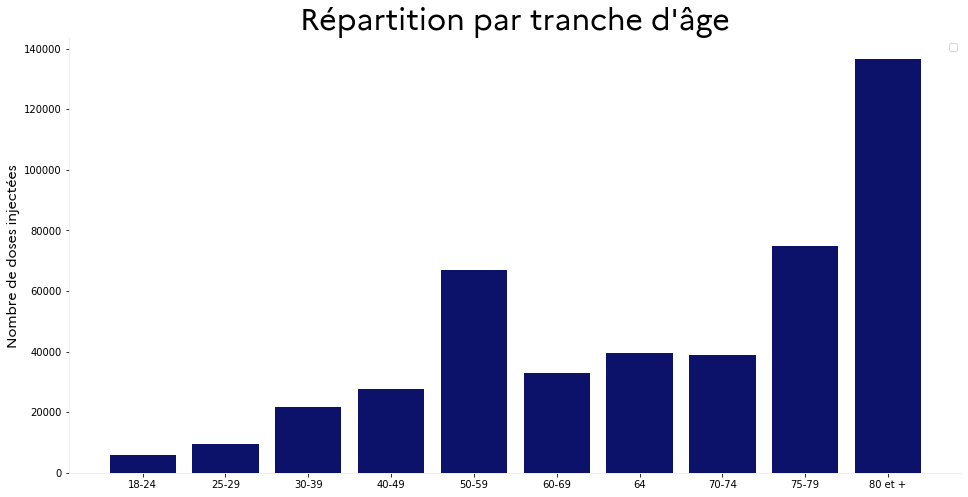

In [342]:
plt.rcParams["figure.figsize"] = (16,8)

width = 0.8       # the width of the bars: can also be len(x) sequence
fig, ax = plt.subplots()

dd = dd.groupby(['jour','clage_vacsi'],as_index=False).sum()
dd = dd[dd['clage_vacsi'] != '0']
labels = dd.clage_vacsi
cumul = dd.n_cum
ax.bar(labels, cumul, width,color="#0C1269")

ax.set_ylabel('Nombre de doses injectées', fontproperties=prop,size="14")
ax.set_title('Répartition par tranche d\'âge', fontproperties=prop,size="30")
ax.legend()

plt.setp(ax.spines.values(), color="#ebebeb")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

In [335]:
dd.clage_vacsi.apply(lambda x: ages[x] if x in ages else x)

0      18-24
1      25-29
2      30-39
3      40-49
4      50-59
5         64
6      60-69
7      70-74
8      75-79
9    80 et +
Name: clage_vacsi, dtype: object

In [336]:
dd

,jour,clage_vacsi,n_tot_dose1,n_tot_dose2,n_cum
0,2021-03-17,24,5384.0,411.0,5795.0
1,2021-03-17,29,8086.0,1398.0,9484.0
2,2021-03-17,39,17380.0,4232.0,21612.0
3,2021-03-17,49,21381.0,6306.0,27687.0
4,2021-03-17,59,49676.0,17392.0,67068.0
5,2021-03-17,64,29997.0,9524.0,39521.0
6,2021-03-17,69,25567.0,7524.0,33091.0
7,2021-03-17,74,30582.0,8334.0,38916.0
8,2021-03-17,79,52386.0,22523.0,74909.0
9,2021-03-17,80,92679.0,43986.0,136665.0
